In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
from nltk.stem.porter import PorterStemmer

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import re  
from scipy.stats import linregress

In [3]:
df = pd.read_excel('Incident data analysis.xlsx',sheet_name='Page 1' )
df.head()

,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,Resolve time,Updated,Updates,Opened
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,1656.0,2020-09-04 16:49:28,10,2020-09-04 16:21:52
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,463.0,2020-09-04 15:32:49,10,2020-09-04 15:25:05
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,309.0,2020-09-04 13:28:17,6,2020-09-04 13:22:23
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,17932.0,2020-09-04 18:18:28,6,2020-09-04 13:19:36
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,32236.0,2020-09-04 19:28:32,7,2020-09-04 10:31:16


In [4]:
df.columns

Index(['Number', 'Short description', 'Priority', 'Tags', 'Category',
       'Subcategory 1', 'Subcategory 2', 'Configuration item', 'Close notes',
       'Problem', 'Resolve time', 'Updated', 'Updates', 'Opened'],
      dtype='object')

In [5]:
df[:13879]

,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,Resolve time,Updated,Updates,Opened
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,1656.0,2020-09-04 16:49:28,10,2020-09-04 16:21:52
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,463.0,2020-09-04 15:32:49,10,2020-09-04 15:25:05
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,309.0,2020-09-04 13:28:17,6,2020-09-04 13:22:23
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,17932.0,2020-09-04 18:18:28,6,2020-09-04 13:19:36
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,32236.0,2020-09-04 19:28:32,7,2020-09-04 10:31:16
5,INC0712198,Please help PR 101209 in ariba stuck as orderi...,3 - Moderate,Incorrectly assigned,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Please help PR 101209 in ar...,NaN,35517.0,2020-09-04 20:00:20,34,2020-09-04 10:08:23
6,INC0712189,PLM Issue-The DOC-0553496 cannot check in as t...,4 - Low,NaN,Application,Teamcenter,Data - Advice & Guidance,PLM (Product Lifecycle Management),Issue Description:\nAction taken: Checked in D...,NaN,12498.0,2020-09-04 13:23:45,8,2020-09-04 09:55:27
7,INC0712162,PO not received by vendor- getting more user f...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,04/09: Resolved: User to manually provide the ...,NaN,31259.0,2020-09-04 18:13:39,7,2020-09-04 09:32:40
8,INC0712135,Censhare: password reset required,4 - Low,NaN,Application,Censhare,Password Reset,censhare Client 2017 Mac,New password issued.,NaN,72.0,2020-09-04 09:06:16,4,2020-09-04 09:05:04
9,INC0712128,prod-digi-db_RDS_HighCPU_Alert | DLO-4037,4 - Low,DXP,Website,Dyson DXP sites,Security,Database Health Monitor 2,Issue Description:\nAction taken: CPU looks fi...,NaN,6285.0,2020-09-04 10:42:38,11,2020-09-04 08:57:53


In [6]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14060 entries, 0 to 14059
Data columns (total 14 columns):
Number                14060 non-null object
Short description     14059 non-null object
Priority              14060 non-null object
Tags                  876 non-null object
Category              14055 non-null object
Subcategory 1         14045 non-null object
Subcategory 2         9726 non-null object
Configuration item    13636 non-null object
Close notes           14059 non-null object
Problem               837 non-null object
Resolve time          14038 non-null float64
Updated               14060 non-null datetime64[ns]
Updates               14060 non-null int64
Opened                14060 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 1.5+ MB


(14060, 14)

In [7]:
print("Total number of records", df.shape[0])
print("Total number of columns", df.shape[1])

Total number of records 14060
Total number of columns 14


In [8]:
df["Short description"][415]  

'8/27 楽天未インポート12件'

In [9]:
df1=df

In [10]:
number = []
number = [26, 77,78,84,203, 216,248,300,324,327,415,598,705,902,928,991, 1053,1104,1107,1113,
          1152,1183,1248,1280,1330,1410,1432,1539,1562,1563,1572,1574,1603,1607, 1641,1685,1775,1819,1825,
          1827, 1908,2017,2074, 2082,2137,2150,2151,2200,2391,2403,2452,2511,2531,2556,2573,2580,
          2581, 2582,2590,2769,2822,3625,3779,3826,3846,3866,3898,3908,3961,3965,3972,3974,
          4102,4183,4312,4317,4321,4334,4346,4416,4432,4433,4438,4464,4468,4567,4585,4616,
          4756,4835,4931,5046,5297,5301,5331,5405,5432,5478,5481,5484,5599,5634,
          5847,5891,5967,5968,6156,6225,6243,6252,6254,6260, 6262,6346,6375,6416,6491,
          6495,6537,6585,6600,6610,6849,6897,6921,6928,6963,7016,7069,7098,7192,7225,7293,
          7348,7512,7542,7577,7634,7635,7771,7851,7860,7940,8104,8151,8235,8278,8302,8306,
          8308,8309,8362,8437,8439,8502,8646,8666,8676,8733,8740,8841,8842,8919,8972,
          9141,9190,9236,9240,9258,9259,9311,9324,9421,9422,9424,9426,9485,9494,9625,9638,
          9644,9689,9697,9699,9763,9772,9835,9919,9921,9966,10001,10043,10161,10162,
          10199,10217,10267,10388,10531,10532,10534,10540,10599,10612,10953,11219,11497,
          11506,11808,11965,12174,12247,12349,12351,12409,12522,12527,12649,12999,13000,13063,
          13080,13081,13341,13438,13439,13641,13749,13750,13938,14058] 

In [11]:
len(number)
df["Short description"][number].to_excel(r'C:\Users\ra20171926\Desktop\sentiment analysis\chines.xlsx', index = False, header=True)
df.drop(df.index[number], inplace=True)
print("records with Chinese character in short description", number, "removed")  
print("Total number of records", df.shape[0])


number = []

for i, value in enumerate(df["Short description"]):
    if type(value) != str:
        number.append(i)
number  

df.drop(df.index[number], inplace=True)

print("1 record with n/a in short description", number, "removed")  
print("Total number of records", df.shape[0])

df["Short description"][number]          


records with Chinese character in short description [26, 77, 78, 84, 203, 216, 248, 300, 324, 327, 415, 598, 705, 902, 928, 991, 1053, 1104, 1107, 1113, 1152, 1183, 1248, 1280, 1330, 1410, 1432, 1539, 1562, 1563, 1572, 1574, 1603, 1607, 1641, 1685, 1775, 1819, 1825, 1827, 1908, 2017, 2074, 2082, 2137, 2150, 2151, 2200, 2391, 2403, 2452, 2511, 2531, 2556, 2573, 2580, 2581, 2582, 2590, 2769, 2822, 3625, 3779, 3826, 3846, 3866, 3898, 3908, 3961, 3965, 3972, 3974, 4102, 4183, 4312, 4317, 4321, 4334, 4346, 4416, 4432, 4433, 4438, 4464, 4468, 4567, 4585, 4616, 4756, 4835, 4931, 5046, 5297, 5301, 5331, 5405, 5432, 5478, 5481, 5484, 5599, 5634, 5847, 5891, 5967, 5968, 6156, 6225, 6243, 6252, 6254, 6260, 6262, 6346, 6375, 6416, 6491, 6495, 6537, 6585, 6600, 6610, 6849, 6897, 6921, 6928, 6963, 7016, 7069, 7098, 7192, 7225, 7293, 7348, 7512, 7542, 7577, 7634, 7635, 7771, 7851, 7860, 7940, 8104, 8151, 8235, 8278, 8302, 8306, 8308, 8309, 8362, 8437, 8439, 8502, 8646, 8666, 8676, 8733, 8740, 8841, 8

3314    No longer able to log on to SAP PO production
Name: Short description, dtype: object

In [12]:
df1.shape

(13828, 14)

In [13]:
df1 = df1.reset_index(drop=True)
df1[[ 'priority_no','priority_desc' ]] = df1.Priority.str.split("-",expand=True)

In [14]:
df1.head()

,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,Resolve time,Updated,Updates,Opened,priority_no,priority_desc
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,1656.0,2020-09-04 16:49:28,10,2020-09-04 16:21:52,4,Low
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,463.0,2020-09-04 15:32:49,10,2020-09-04 15:25:05,4,Low
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,309.0,2020-09-04 13:28:17,6,2020-09-04 13:22:23,4,Low
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,17932.0,2020-09-04 18:18:28,6,2020-09-04 13:19:36,4,Low
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,32236.0,2020-09-04 19:28:32,7,2020-09-04 10:31:16,4,Low


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 16 columns):
Number                13828 non-null object
Short description     13828 non-null object
Priority              13828 non-null object
Tags                  876 non-null object
Category              13823 non-null object
Subcategory 1         13813 non-null object
Subcategory 2         9702 non-null object
Configuration item    13405 non-null object
Close notes           13827 non-null object
Problem               836 non-null object
Resolve time          13806 non-null float64
Updated               13828 non-null datetime64[ns]
Updates               13828 non-null int64
Opened                13828 non-null datetime64[ns]
priority_no           13828 non-null object
priority_desc         13785 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(12)
memory usage: 1.7+ MB


In [16]:
df1['Category'].isnull().values.any()

True

In [17]:
df1['Category'].isnull().sum()

5

In [18]:
df1['Category'] = df1['Category'].astype('category')

In [19]:
df1['Category_no'] = df1['Category'].cat.codes.replace(-1, np.nan)


In [20]:
df1[320:]

,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,Resolve time,Updated,Updates,Opened,priority_no,priority_desc,Category_no
320,INC0696089,Please cancel backorder 1790077104. (Deloitte ...,4 - Low,L1 Support,Application,SAP OTC,Sales Order Change,S4HANA,Issue: Please cancel backorder 1790077104. (De...,NaN,19664.0,2020-09-02 15:01:33,16,2020-08-28 09:09:17,4,Low,0.0
321,INC0696087,Requires access to Amend customer in MDG,4 - Low,NaN,Application,SAP Security,Roles/Profiles,S4HANA,Assigned requested MDG roles to user SKILBY in...,NaN,625436.0,2020-09-04 14:46:02,18,2020-08-28 09:02:06,4,Low,0.0
322,INC0696085,PLM issues in Vis - parts not showing or are i...,4 - Low,NaN,Application,Teamcenter,Data - Advice & Guidance,PLM (Product Lifecycle Management),Issue Description:\nAction taken: Remove o-rin...,NaN,455535.0,2020-09-02 15:31:43,16,2020-08-28 08:59:28,4,Low,0.0
323,INC0696058,GR - keep receiveing error GR email notificati...,4 - Low,NaN,Application,Ariba - Buying,Receipt,SAP,Issue Description: GR not sent to SAP due to E...,NaN,470740.0,2020-09-02 19:18:58,131,2020-08-28 08:33:18,4,Low,0.0
324,INC0696056,Invalid fiscal code(Captured based from Engage...,4 - Low,NaN,Application,Engage,Sales,Engage,Issue Description: Invalid fiscal code(Capture...,NaN,236.0,2020-09-02 09:04:18,6,2020-08-28 08:27:01,4,Low,0.0
325,INC0695984,"Hi, need help to reject workflow for CR-112609...",4 - Low,NaN,Application,Teamcenter,Workflow - Advice & Guidance,PLM (Product Lifecycle Management),CRs workflow have been cancelled.,NaN,7843.0,2020-08-31 03:32:51,9,2020-08-28 08:19:05,4,Low,0.0
326,INC0695904,ZIP file attached to DOC-0135912 has no named ...,4 - Low,NaN,Application,Teamcenter,Data - Advice & Guidance,PLM (Product Lifecycle Management),Issue Description:\nAction taken: Attached ZIP...,NaN,603.0,2020-09-02 09:00:49,6,2020-08-28 08:14:06,4,Low,0.0
327,INC0695730,my censhare cant access,3 - Moderate,NaN,Application,Censhare,Password Reset,censhare Client 2017,New password issued,NaN,5826.0,2020-09-02 10:01:16,28,2020-08-28 07:56:13,3,Moderate,0.0
328,INC0695728,PO6000040357 - just posted GR via Ariba date 2...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,01/09: Resolved: Mapped to PRB0043275,PRB0043275,368879.0,2020-09-01 14:22:12,16,2020-08-28 07:54:13,4,Low,0.0
329,INC0695727,Cannot do the reverse GR for PO#6000063341.,4 - Low,NaN,Application,Ariba - Buying,Receipt,SAP,Issue Description: Cannot do the reverse GR fo...,NaN,380811.0,2020-09-01 17:40:27,20,2020-08-28 07:53:36,4,Low,0.0


In [21]:
df1['Subcategory 1'] = df1['Subcategory 1'].astype('category')

In [22]:
df1['Subcategory 2'] = df1['Subcategory 2'].astype('category')

In [23]:
df1['Configuration item'] = df1['Configuration item'].astype('category')

In [24]:
df1['Subcategory1_no'] = df1['Subcategory 1'].cat.codes.replace(-1, np.nan)

In [25]:
df1['Subcategory2_no'] = df1['Subcategory 2'].cat.codes.replace(-1, np.nan)

In [26]:
df1['Configuration_item_no'] = df1['Configuration item'].cat.codes.replace(-1, np.nan)

In [27]:
df1.head()

,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,Resolve time,Updated,Updates,Opened,priority_no,priority_desc,Category_no,Subcategory1_no,Subcategory2_no,Configuration_item_no
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,1656.0,2020-09-04 16:49:28,10,2020-09-04 16:21:52,4,Low,14.0,33.0,174.0,85.0
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,463.0,2020-09-04 15:32:49,10,2020-09-04 15:25:05,4,Low,0.0,90.0,NaN,135.0
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,309.0,2020-09-04 13:28:17,6,2020-09-04 13:22:23,4,Low,8.0,62.0,NaN,118.0
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,17932.0,2020-09-04 18:18:28,6,2020-09-04 13:19:36,4,Low,0.0,9.0,218.0,136.0
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,32236.0,2020-09-04 19:28:32,7,2020-09-04 10:31:16,4,Low,0.0,9.0,218.0,136.0


In [28]:
df1['updated_date'] = df['Updated'].dt.date

In [29]:
df1['updated_time'] = df['Updated'].dt.time

In [30]:
df1['updated_day'] = df['Updated'].dt.day

In [31]:
df1['diff_min']  = (df1.Updated - df1.Opened)


# In[26]:


df1['diff_min']  = df1['diff_min']/np.timedelta64(1,'m')


# In[27]:


df1.head()


,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,...,priority_no,priority_desc,Category_no,Subcategory1_no,Subcategory2_no,Configuration_item_no,updated_date,updated_time,updated_day,diff_min
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,...,4,Low,14.0,33.0,174.0,85.0,2020-09-04,16:49:28,4.0,27.600000
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,...,4,Low,0.0,90.0,NaN,135.0,2020-09-04,15:32:49,4.0,7.733333
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,...,4,Low,8.0,62.0,NaN,118.0,2020-09-04,13:28:17,4.0,5.900000
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,...,4,Low,0.0,9.0,218.0,136.0,2020-09-04,18:18:28,4.0,298.866667
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,...,4,Low,0.0,9.0,218.0,136.0,2020-09-04,19:28:32,4.0,537.266667


In [32]:
df1['Opened_date'] = df['Opened'].dt.date


# In[29]:


df1['Opened_time'] = df['Opened'].dt.time


# In[30]:


df1['Opened_day'] = df['Opened'].dt.day


# In[31]:


df1.head()



,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,...,Subcategory1_no,Subcategory2_no,Configuration_item_no,updated_date,updated_time,updated_day,diff_min,Opened_date,Opened_time,Opened_day
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,...,33.0,174.0,85.0,2020-09-04,16:49:28,4.0,27.600000,2020-09-04,16:21:52,4.0
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,...,90.0,NaN,135.0,2020-09-04,15:32:49,4.0,7.733333,2020-09-04,15:25:05,4.0
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,...,62.0,NaN,118.0,2020-09-04,13:28:17,4.0,5.900000,2020-09-04,13:22:23,4.0
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,...,9.0,218.0,136.0,2020-09-04,18:18:28,4.0,298.866667,2020-09-04,13:19:36,4.0
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,...,9.0,218.0,136.0,2020-09-04,19:28:32,4.0,537.266667,2020-09-04,10:31:16,4.0


In [33]:
target1 = []
target2 = []
target3 = []
target4 = []
target5 = []
target6 = []
target7 = []

   
# In[34]:

target1 = []
i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Issue Description: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Issue Description:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target1.append(desc)
    i = i + 1
                         
df_target1 = pd.DataFrame(target1,columns = ['issue_description'])


# In[35]:
df1['issue_description'] = df_target1['issue_description']


target2 = []
i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Resolved at: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Resolved at:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target2.append(desc)
    i = i + 1
# In[38]:


df_target2 = pd.DataFrame(target2,columns = ['resolved_at'])


# In[39]:


df1['resolved_at'] = df_target2['resolved_at']


df1['resolved_at'] = df1['resolved_at'].str.strip()

# In[40]:


target3 = []

i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Action taken: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Action taken:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target3.append(desc)
    i = i + 1
# In[42]:


df_target3 = pd.DataFrame(target3,columns = ['action taken:'])


# In[43]:


df1['action taken:'] = df_target3['action taken:']
df1['action taken:'] = df1['action taken:'].str.strip()

In [34]:
target4 = []
i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Business impact: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Business impact:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target4.append(desc)
    i = i + 1
# In[45]:


df_target4 = pd.DataFrame(target4,columns = ['business_impact'])

In [35]:
df1['business_impact'] = df_target4['business_impact']

df1['business_impact'] = df1['business_impact'].str.strip()

In [36]:
target5 = []
i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Future action required: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Future action required:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target5.append(desc)
    i = i + 1

In [37]:
df_target5 = pd.DataFrame(target5,columns = ['future_action_required'])

In [38]:
df1['future_action_required'] = df_target5['future_action_required']


df1['future_action_required'] = df1['future_action_required'].str.strip()

target6 = []
i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Resolved by: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Resolved by:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target6.append(desc)
    i = i + 1
# In[51]:


df_target6 = pd.DataFrame(target6,columns = ['resolved_by'])

In [39]:
df1['resolved_by'] = df_target6['resolved_by']

df1['resolved_by'] = df1['resolved_by'].str.strip()

In [40]:
target7 = []
i = 0
for idx in range(0, len(df1['Close notes'])):  
    desc = ' '
    val = df1['Close notes'][idx]
    if type(val) == str:
        temp = re.search("Resolution confirmed by: .*", val)
        aa = ()
        if temp is not None:
            tempy =  re.search('\w*\s\w*',temp.group()) 
            cc = tempy.string
            aa = cc.partition('Resolution confirmed by:')
            desc = aa[2].strip()
        else:
            desc = None
    else:
        desc = None
    target7.append(desc)
    i = i + 1

In [41]:
df_target7 = pd.DataFrame(target7,columns = ['resolution_confirmed_by'])


# In[56]:


df1['resolution_confirmed_by'] = df_target7['resolution_confirmed_by']

In [42]:
df1.head()

,Number,Short description,Priority,Tags,Category,Subcategory 1,Subcategory 2,Configuration item,Close notes,Problem,...,Opened_date,Opened_time,Opened_day,issue_description,resolved_at,action taken:,business_impact,future_action_required,resolved_by,resolution_confirmed_by
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,NaN,Website,Dyson DXP sites,My Dyson - FE,Hybris,Please help the customer register for a My Dys...,NaN,...,2020-09-04,16:21:52,4.0,None,None,None,None,None,None,None
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,NaN,Application,SAP RTR,NaN,S4HANA,Ticket duplicated,NaN,...,2020-09-04,15:25:05,4.0,None,None,None,None,None,None,None
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,NaN,Other,Other,NaN,Other,Issue Description:\nAction taken: The nodes ar...,NaN,...,2020-09-04,13:22:23,4.0,None,None,The nodes are healthy now.,None,None,None,None
3,INC0712635,PO stuck in 'Ordering',4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: PO stuck in 'Ordering'\nAct...,NaN,...,2020-09-04,13:19:36,4.0,PO stuck in 'Ordering',9/4/2020,PO is stuck in Ordering. Mapped to monitoring ...,PO stuck in Ordering,None,Angelica Abugan,None
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,NaN,Application,Ariba - Buying,Purchase Order,SAP,Issue Description: Dyson entity 8700 PO6000077...,NaN,...,2020-09-04,10:31:16,4.0,Dyson entity 8700 PO6000077973 and PO 60000779...,9-4-20,Mapped to master ticket INC0700746,None,None,Kathyrine Bayrante,None


In [43]:
column_names = [ 'incident_number', "short_description", "priority", "priority_desc", "priority_no", "tags", "category", 'category_no',
                 'subcategory1', 'subcategory1_no', 'subcategory2','subcategory2_no', 'configuration_item', 'configuration_item_no', 'close_notes',
                "issue_description", "action_taken", "business_impact", "resolved_at", "resolved_by", 
                "resolution_confirmed_by", "future_action_required","problem", "resolve_time", "updated", 
                "updated_date", "updated_time", "updated_day", "updates", "opened", "diff_min",
                "opened_date", "opened_time", "opened_day",  "all_categories", "all_items", "resolve_time_updates"] 


# In[59]:


column_names


['incident_number',
 'short_description',
 'priority',
 'priority_desc',
 'priority_no',
 'tags',
 'category',
 'category_no',
 'subcategory1',
 'subcategory1_no',
 'subcategory2',
 'subcategory2_no',
 'configuration_item',
 'configuration_item_no',
 'close_notes',
 'issue_description',
 'action_taken',
 'business_impact',
 'resolved_at',
 'resolved_by',
 'resolution_confirmed_by',
 'future_action_required',
 'problem',
 'resolve_time',
 'updated',
 'updated_date',
 'updated_time',
 'updated_day',
 'updates',
 'opened',
 'diff_min',
 'opened_date',
 'opened_time',
 'opened_day',
 'all_categories',
 'all_items',
 'resolve_time_updates']

In [44]:
df_final = pd.DataFrame(columns = column_names)

In [45]:
type(df_final)

pandas.core.frame.DataFrame

In [46]:
df_final['incident_number'] = df1['Number']


# In[63]:


df_final['short_description'] = df1['Short description']


# In[64]:


df_final['priority'] = df1['Priority']


# In[65]:


df_final['priority_desc'] = df1['priority_desc']
df_final['priority_no'] = df1['priority_no']
df_final['tags'] = df1['Tags']
df_final['category'] = df1['Category']
df_final['category_no'] = df1['Category_no']
df_final['subcategory1'] = df1['Subcategory 1']
df_final['subcategory1_no'] = df1['Subcategory1_no']

df_final['subcategory2'] = df1['Subcategory 2']
df_final['subcategory2_no'] = df1['Subcategory2_no']
df_final['configuration_item'] = df1['Configuration item']
df_final['configuration_item_no'] = df1['Configuration_item_no']
df_final['close_notes'] = df1['Close notes']

df_final['issue_description'] = df1['issue_description']
df_final['action_taken'] = df1['action taken:']
df_final['business_impact'] = df1['business_impact']
df_final['resolved_at'] = df1['resolved_at']
df_final['resolved_by'] = df1['resolved_by']
df_final['resolution_confirmed_by'] = df1['resolution_confirmed_by']
df_final['future_action_required'] = df1['future_action_required']

df_final['problem'] = df1['Problem']
df_final['resolve_time'] = df1['Resolve time']
df_final['updated'] = df1['Updated']
df_final['updated_date'] = df1['updated_date']
df_final['updated_time'] = df1['updated_time']
df_final['updated_day'] = df1['updated_day']
df_final['updates'] = df1['Updates']
df_final['opened'] = df1['Opened']

df_final['diff_min'] = df1['diff_min']
df_final['opened_date'] = df1['Opened_date']
df_final['opened_time'] = df1['Opened_time']

df_final['opened_day'] = df1['Opened_day']

In [47]:
df1.columns

Index(['Number', 'Short description', 'Priority', 'Tags', 'Category',
       'Subcategory 1', 'Subcategory 2', 'Configuration item', 'Close notes',
       'Problem', 'Resolve time', 'Updated', 'Updates', 'Opened',
       'priority_no', 'priority_desc', 'Category_no', 'Subcategory1_no',
       'Subcategory2_no', 'Configuration_item_no', 'updated_date',
       'updated_time', 'updated_day', 'diff_min', 'Opened_date', 'Opened_time',
       'Opened_day', 'issue_description', 'resolved_at', 'action taken:',
       'business_impact', 'future_action_required', 'resolved_by',
       'resolution_confirmed_by'],
      dtype='object')

In [48]:
df_final['all_categories'] =  df_final['subcategory1'].astype(str) +' '+ df_final['subcategory2'].astype(str)


# In[68]:


df_final['all_items'] =  df_final['configuration_item'].astype(str) +' '+ df_final['category'].astype(str) +' ' + df_final['subcategory1'].astype(str) +' '+ df_final['subcategory2'].astype(str)


# In[69]:


df_final.head()



,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,updated_day,updates,opened,diff_min,opened_date,opened_time,opened_day,all_categories,all_items,resolve_time_updates
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,4.0,10,2020-09-04 16:21:52,27.600000,2020-09-04,16:21:52,4.0,Dyson DXP sites My Dyson - FE,Hybris Website Dyson DXP sites My Dyson - FE,NaN
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,4.0,10,2020-09-04 15:25:05,7.733333,2020-09-04,15:25:05,4.0,SAP RTR nan,S4HANA Application SAP RTR nan,NaN
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,4.0,6,2020-09-04 13:22:23,5.900000,2020-09-04,13:22:23,4.0,Other nan,Other Other Other nan,NaN
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,4.0,6,2020-09-04 13:19:36,298.866667,2020-09-04,13:19:36,4.0,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,4.0,7,2020-09-04 10:31:16,537.266667,2020-09-04,10:31:16,4.0,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN


In [49]:
df_final['updated_day'] = df_final['updated'].dt.weekday_name


# In[71]:


df_final['opened_day'] = df_final['opened'].dt.weekday_name

In [50]:
df_final.to_excel(r'C:\Users\ra20171926\Desktop\sentiment analysis\17incident.xlsx', index = False, header=True)


In [51]:
df_temp = df_final

In [52]:
df_temp[:13878]

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,updated_day,updates,opened,diff_min,opened_date,opened_time,opened_day,all_categories,all_items,resolve_time_updates
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,Friday,10,2020-09-04 16:21:52,27.600000,2020-09-04,16:21:52,Friday,Dyson DXP sites My Dyson - FE,Hybris Website Dyson DXP sites My Dyson - FE,NaN
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,Friday,10,2020-09-04 15:25:05,7.733333,2020-09-04,15:25:05,Friday,SAP RTR nan,S4HANA Application SAP RTR nan,NaN
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,Friday,6,2020-09-04 13:22:23,5.900000,2020-09-04,13:22:23,Friday,Other nan,Other Other Other nan,NaN
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,Friday,6,2020-09-04 13:19:36,298.866667,2020-09-04,13:19:36,Friday,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,Friday,7,2020-09-04 10:31:16,537.266667,2020-09-04,10:31:16,Friday,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN
5,INC0712198,Please help PR 101209 in ariba stuck as orderi...,3 - Moderate,Moderate,3,Incorrectly assigned,Application,0.0,Ariba - Buying,9.0,...,Friday,34,2020-09-04 10:08:23,591.950000,2020-09-04,10:08:23,Friday,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN
6,INC0712189,PLM Issue-The DOC-0553496 cannot check in as t...,4 - Low,Low,4,NaN,Application,0.0,Teamcenter,105.0,...,Friday,8,2020-09-04 09:55:27,208.300000,2020-09-04,09:55:27,Friday,Teamcenter Data - Advice & Guidance,PLM (Product Lifecycle Management) Application...,NaN
7,INC0712162,PO not received by vendor- getting more user f...,4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,Friday,7,2020-09-04 09:32:40,520.983333,2020-09-04,09:32:40,Friday,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN
8,INC0712135,Censhare: password reset required,4 - Low,Low,4,NaN,Application,0.0,Censhare,21.0,...,Friday,4,2020-09-04 09:05:04,1.200000,2020-09-04,09:05:04,Friday,Censhare Password Reset,censhare Client 2017 Mac Application Censhare ...,NaN
9,INC0712128,prod-digi-db_RDS_HighCPU_Alert | DLO-4037,4 - Low,Low,4,DXP,Website,14.0,Dyson DXP sites,33.0,...,Friday,11,2020-09-04 08:57:53,104.750000,2020-09-04,08:57:53,Friday,Dyson DXP sites Security,Database Health Monitor 2 Website Dyson DXP si...,NaN


In [53]:
df_temp.loc[df_temp['priority'] == 'VIP', 'priority_desc'] = 'Low'


In [54]:
df_temp.loc[df_temp['priority'] == 'VIP', 'priority_no'] = 4

In [55]:
df_temp.loc[df_temp['priority'] == 'VIP', 'priority'] = '4 - Low'

In [56]:
df_temp['issue_description'][3]

"PO stuck in 'Ordering'"

In [57]:
df_temp.loc[df_temp['short_description'] != df_temp['issue_description'], 'descriptionmatch'] = 'Not Similar'


In [58]:
df_temp.loc[df_temp['short_description'] == df_temp['issue_description'], 'descriptionmatch'] = 'Similar'


# In[82]:


print(df_temp.pivot_table(index = ['descriptionmatch'], aggfunc='size'))


# In[89]:


df_temp.isnull().values.any()

descriptionmatch
Not Similar    10256
Similar         3572
dtype: int64


True

In [59]:
df_temp.isnull().sum().sum()

117194

In [60]:
df_temp.columns


# In[93]:


df_temp.loc[df_temp['short_description'].isnull()].T


# In[99]:


null_columns = df_temp.columns[df_temp.isnull().any()]

In [61]:
null_columns

Index(['tags', 'category', 'category_no', 'subcategory1', 'subcategory1_no',
       'subcategory2', 'subcategory2_no', 'configuration_item',
       'configuration_item_no', 'close_notes', 'issue_description',
       'action_taken', 'business_impact', 'resolved_at', 'resolved_by',
       'resolution_confirmed_by', 'future_action_required', 'problem',
       'resolve_time', 'updated_date', 'updated_time', 'opened_date',
       'opened_time', 'resolve_time_updates'],
      dtype='object')

In [62]:
df_temp[null_columns].isnull().sum()

tags                       12952
category                       5
category_no                    5
subcategory1                  15
subcategory1_no               15
subcategory2                4126
subcategory2_no             4126
configuration_item           423
configuration_item_no        423
close_notes                    1
issue_description           7841
action_taken                7636
business_impact             9789
resolved_at                10104
resolved_by                 9556
resolution_confirmed_by    10838
future_action_required     11577
problem                    12992
resolve_time                  22
updated_date                 230
updated_time                 230
opened_date                  230
opened_time                  230
resolve_time_updates       13828
dtype: int64

In [63]:
df_temp.columns

Index(['incident_number', 'short_description', 'priority', 'priority_desc',
       'priority_no', 'tags', 'category', 'category_no', 'subcategory1',
       'subcategory1_no', 'subcategory2', 'subcategory2_no',
       'configuration_item', 'configuration_item_no', 'close_notes',
       'issue_description', 'action_taken', 'business_impact', 'resolved_at',
       'resolved_by', 'resolution_confirmed_by', 'future_action_required',
       'problem', 'resolve_time', 'updated', 'updated_date', 'updated_time',
       'updated_day', 'updates', 'opened', 'diff_min', 'opened_date',
       'opened_time', 'opened_day', 'all_categories', 'all_items',
       'resolve_time_updates', 'descriptionmatch'],
      dtype='object')

In [64]:
pip install tabulate


The following command must be run outside of the IPython shell:

    $ pip install tabulate

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [65]:
print('NaN values in category column')
print(df_temp['category'].isnull().sum())
print('NaN values in subcategory1 column')
print(df_temp['subcategory1'].isnull().sum())
print('NaN values in subcategory2 column')
print(df_temp['subcategory2'].isnull().sum())
print('NaN values in configuration_item column')
print(df_temp['configuration_item'].isnull().sum())


cat = df_temp['category'].isnull().sum()
subcat1 = df_temp['subcategory1'].isnull().sum()
subcat2 = df_temp['subcategory2'].isnull().sum()
config = df_temp['configuration_item'].isnull().sum()


from tabulate import tabulate

print('NaN values')
print(tabulate([['category', cat], ['subcategory1', subcat1],
                ['subcategory2', subcat2], ['configuration_item', config] ], 
               headers=['column', 'count']))

NaN values in category column
5
NaN values in subcategory1 column
15
NaN values in subcategory2 column
4126
NaN values in configuration_item column
423
NaN values
column                count
------------------  -------
category                  5
subcategory1             15
subcategory2           4126
configuration_item      423


In [66]:
df_temp.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,updates,opened,diff_min,opened_date,opened_time,opened_day,all_categories,all_items,resolve_time_updates,descriptionmatch
0,INC0713025,Customer is requesting a working link to chang...,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,10,2020-09-04 16:21:52,27.600000,2020-09-04,16:21:52,Friday,Dyson DXP sites My Dyson - FE,Hybris Website Dyson DXP sites My Dyson - FE,NaN,Not Similar
1,INC0712761,SAP FEBA Access to enable change of layout. Pe...,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,10,2020-09-04 15:25:05,7.733333,2020-09-04,15:25:05,Friday,SAP RTR nan,S4HANA Application SAP RTR nan,NaN,Not Similar
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unheal...,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,6,2020-09-04 13:22:23,5.900000,2020-09-04,13:22:23,Friday,Other nan,Other Other Other nan,NaN,Not Similar
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,6,2020-09-04 13:19:36,298.866667,2020-09-04,13:19:36,Friday,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN,Similar
4,INC0712218,Dyson entity 8700 PO6000077973 and PO 60000779...,4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,7,2020-09-04 10:31:16,537.266667,2020-09-04,10:31:16,Friday,Ariba - Buying Purchase Order,SAP Application Ariba - Buying Purchase Order,NaN,Similar


In [67]:
df_temp.resolution_confirmed_by.isnull().sum()
df_temp['resolution_confirmed_by'] = df_temp.resolution_confirmed_by.replace(r'^\s*$', np.nan, regex=True)

df_temp['resolution_confirmed_by'] = df_temp['resolution_confirmed_by'].fillna(('Unassigned'))

df_temp['resolved_by'] = df_temp.resolved_by.replace(r'^\s*$', np.nan, regex=True)

df_temp.resolved_by.isnull().sum()

df_temp['resolved_by'] = df_temp['resolved_by'].fillna(('Unassigned'))

In [68]:
df_temp1 = df_temp

import re

In [69]:
from textblob import TextBlob

In [70]:
df_action = df_temp1

df_action['action_taken']=df_action['action_taken'].fillna(' ')
pd.set_option('display.max_colwidth',200)
df_action['action_taken'].head(10)

0                                                                    
1                                                                    
2                                          The nodes are healthy now.
3    PO is stuck in Ordering. Mapped to monitoring ticket: INC0700746
4                                  Mapped to master ticket INC0700746
5                                                                    
6                                Checked in DOC revision and datasets
7                                                                    
8                                                                    
9                                                 CPU looks fine now.
Name: action_taken, dtype: object

In [71]:
df_action['problem_description'] = df_action['short_description']

df_action['problem_description']

for i, row in df_action.iterrows():
    if(pd.isnull(row['short_description'])):
        if(pd.isnull(row['issue_description'])):
            print('Drop: ', row['incident_number'])
            print('----------------------------------------')
#           df_test = df_test.drop[row['incident_number']]
#         else:
#             print('Missing SD: ', row['short_description'])
#             print('===========================')
    elif(pd.isnull(row['issue_description'])):
        print('Append: ', row['short_description'])
        df_action['problem_description'][i] = row['short_description']
    elif len(str(row['short_description'])) > len(str(row['issue_description'])):
        print('Short description is longer')
        df_action['problem_description'][i] = row['short_description']
    elif len(str(row['issue_description'])) >= len(str(row['short_description'])):
        print('Issue description is longer than or equal to the short description.')
        df_action['problem_description'][i] = row['issue_description']

Append:  Customer is requesting a working link to change password
Append:  SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).
Append:  prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Append:  PLM Issue-The DOC-0553496 cannot check in as the system showed object not check out. It was confusing.
Append:  PO not received by vendor- getting more user feedback this . Please check and update
Append:  Censhare: password reset required
Append:   prod-digi-db_RDS_HighCPU_Alert | DLO-4037
Issue description is longer than or equal to the short description.
Append:  494726 / 2020 MDG Performance Issue 
Append:  620331 / 2020 MDG Export App does not work when more number of materials 
Append:  PR101643 got stuck in ordering state
Issue description is longer than or equal to the short description.
Append:  Revert back NX dwg file of 244835-00/07 to 244835-00/06
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  PR101948 is stopping at Ordering status
Issue description is longer than or equal to the short description.
A

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Append:  CO-IT | DE-2914 | Tmall Genie Account Linking failed on CN PRD Env
Append:  Offer not displayed on the website. dyson.fr when added to the cart
Issue description is longer than or equal to the short description.
Append:  SAP BIP account locked  for Dyson IT service desk 
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Short description is longer
Append:  Lost password for SAP BW (BI)
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Need my censhare password reset.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  CRM is not working 
Append:  Unable to access CRM
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Having trouble loggin

Append:  Need to reverse a Credit Note with wrong billing date
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Need access to V/LD in SAP to check pricing condition
Append:  Error from external system for receipt RC120214 (6000031044)
Issue description is longer than or equal to the short description.
Append:  Workflow stuck in process, unable to obtain invoice number
Append:  Unable to open documents from PLM Teamcenter. Opening any documents will load the Teamcenter application launch mechanism.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Tolerance Stack Template not able to add dimension
Append:  CR stuck in work flow due to PLM system error
Issue description is longer than or equal to the shor

Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  PO6000075379 & PO 6000045127-GR error email notification received. After sometime the mentioned only successfully posted in SAP & received GR email notification
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  please change approver for PR81595-V2 and PR98750, PR98748,PR98745,PR98739,PR97176 from sinoue to kkimura
Append:  Could not withdraw or revise the MDG request after submitting the request.
Append:  Multisite > MY/SG to SG/ MY /UK -  28082020
Append:  could you please change approver from sinoue to kkimura?
Append:  MyPOS　未インポート　8/28
Issue description is longer than or equal to the short description.
Append:  PLM project request status query
Issue description is longer than or equal to the short description.
Issue d

Short description is longer
Append:  Order type 'ZWEB' has not been defined in Sales area <'6200','01','01'> Sales document was not changed 08242020
Issue description is longer than or equal to the short description.
Append:   AMS Monitoring: PR stuck in Composing - PR98692-V2
Short description is longer
Append:  Pricing interface issue in QA - Q41 to XIQ
Append:  Images not showing on page in global | DLO-3970
Issue description is longer than or equal to the short description.
Append:  Failed delivery of PO to supplier email address, even though suppliers email is correct on the system
Append:  Material xxxxxx-xx is not listed and therefore not allowed 08242020
Append:  having issues with a part in NX - insufficient memory access.
Append:  Cannot access CH stock list in SAP
Append:  Can't login to Censhare
Append:  Identified a number of IBDs that have FWD processed to DOPL but are showing FWD Status A not C.
Issue description is longer than or equal to the short description.
Issue de

Append:  URGENT Navigation Item not clickable | CCI-989
Append:  To reverse GR for PO#6000005459 for Ariba PO.
Append:  Forgotten censhare password
Append:  cannot open Teamcenter while in VCAD
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  cancelled
Append:  Web order 1740140720 has no address on SalesForce and SAP | DLO-3946
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Append:  244837-11/02 having issues when up-revise to rev 03
Issue description is longer than or equal to the short description.
Append:  [US] ChannelAdvisor - Cancellation in error - Proactive
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the sh

Append:  Whitelisting IP's from Salesforce to Mulesoft - EMEA region  | MSC-2407
Append:   Please re push the bellow orders
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  V8 Total Clean, 342198-01 - Price issue on websites - Sweden and Norway
Issue description is longer than or equal to the short description.
Append:  Rejected WBS PR cannot re-raise
Append:  Can't access Censhare
Append:  Can't edit AEM pages
Append:  334329-01/06 have an unwanted drawing generated during WF. Would like to know how this happened.
Issue description is longer than or equal to the short description.
Append:  NL price is not showing on front end for 268791-01 V11 Absolute Pro | CCI-983
Append:  Reassign DOC approval task to a different user
Append:  Censhare password reset
Iss

Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Guideline of reversal BWD GR process
Short description is longer
Append:  Canceled
Append:  Stuck orders in SAP for 18th of August in status "waitForERPConfirmation"
Append:  Unable to remove L at PO under 9499 for the item after rework
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Censhare issue - PDF creating issue
Append:  PO 6000075377 - PO amount SGD 114, should be auto GR after approved but it not hapenned and reflect "Submitted" at Receipt tab?
Append:  CENSHARE - Cannot create PDF thru censhare.
Append:  Multisite > MY/SG 

Issue description is longer than or equal to the short description.
Append:  Unable to access censhare
Issue description is longer than or equal to the short description.
Append:  Stuck in Hybris order
Append:  Spike in OCC GC activity and subsequent addition of 2 nodes to OCC ASG | DLO-3902
Issue description is longer than or equal to the short description.
Append:  Cannot access staging.shop.dyson.pl
Short description is longer
Short description is longer
Append:  Shipping line not PGI'd in SAP
Append:  CENSHARE - 3 assets need reverting to previous versions asap
Issue description is longer than or equal to the short description.
Append:  Process error after activation after approved in MDG
Append:  Material xxxxxx-xx is not defined for sales org.xxxx (8/14/2020)
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Warranty / Goodwill (Pricelist, reason code) (8/14/2020)
Issue description is l

Append:  [EXTERNAL EMAIL] EDI-INVOIC Error - Dyson SA - 2200914
Append:  Unable to access Hybris application
Short description is longer
Append:  End date missing from IA payroll file
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  The S4 failed to update the changes after approval from MGD (FAO Ana C. aware of this)
Append:  orders for retired parts need deleted.
Append:  Part needs changing on 130 order due to no stock
Append:  Customers not recieving payment link emails. These are new outbound emails, not replies to existing threads. Boldchat.
Append:  TS-102236/01  Cannot send for production
Append:  FAO Ana C. - Duplicate standard vendors coming through from MDG
Append:  Delivery and invoice created 2 years later
Issue description is longer than or equal to the short description.
Append:  I am trying to release some pa

Append:  [ES] Order ahs been sent to the warehouse even postal code was missing in sap
Issue description is longer than or equal to the short description.
Append:  Dyson nordics - V11 absolute extra - Unable to add to basket in SF | CSS-8364
Issue description is longer than or equal to the short description.
Append:  QAS not working on advisors PC's, unable to located customer addresses
Issue description is longer than or equal to the short description.
Short description is longer
Append:  User is unable to update the address page in SAP CRM
Append:  SAP Giving error while clicking on QAS
Append:  CRM Issue
Issue description is longer than or equal to the short description.
Append:  order cancelled in SAP 1740137037
Issue description is longer than or equal to the short description.
Append:  Origin is giving a 503 intermittently & taking time to load
Append:  Our main Project Assembly File (GA) will not open. It says it could not be loaed
Append:  Hyrbis Database has locked | PRB004355

Issue description is longer than or equal to the short description.
Append:  Error message when visiting page/row config on Magento | Thailand
Append:  Error message when visiting page/row config on Magento | Malaysia
Short description is longer
Issue description is longer than or equal to the short description.
Append:  CR-1210443/01 cannot be authorized as three Solution items were transferred to MY Server
Append:  Multisite > MY/SG to SG/ MY /UK -  07082020
Issue description is longer than or equal to the short description.
Append:  "Bad Request" error on export | Australia
Short description is longer
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than

Issue description is longer than or equal to the short description.
Append:  Cannot perform master PR with linked duplicated PRs in PLM
Short description is longer
Append:  Order 90050209 was rejected in Magento but flow into Engage and SAP | Singapore
Append:  Multisite > MY/SG to SG/ MY /UK -  05082020
Append:  DYS_Inventory summary - tableau inventory summary tab
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Files (Drawing, CAD and Excels) are missing after up-revised into a new revision.
Append:  Flextronics CM unable to connect to Dyson sFTP
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  R1 - Services: Dump MESSAGE_TYPE_UNKNOWN on SAPFV45K from user CRM2ECC for 12 hours
Append:  [EXTERNAL EMAI

Append:  Direct Store Returns view as Sales Orders in system
Append:  R1 - Services: Dump COLLECT_OVERFLOW_TYPE_P on SAPLATP2 from RFC calls from SAP CRM
Append:  SAP BUSINESS 7. - CREATE ORDER
Append:  User ronny.mutke@cpm-int.com unable to log into Boldchat app
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Append:  EU Salesforce and web are out of sync creating error "STRING_TOO_LONG, Shipping City: data value too large" | CSS-8255
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  971045-05 no shipping point at CN when do stock transfer
Issue description is longer than or equal to the short description.
Append:  CC_CN_Damco_DespatchAdvice_Sender_FTP_v2 in error
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  'Partial Delivery Allowed' message comes up when I tried to raise an amend request.
Issue description is longer than or equal to the short description.
Issue description is longer than o

Append:  Missing data in Ricardo - dated 17/7
Append:  Request to cancel "Parent Processes" under T122702/02, which caused error generate workflow sign off report of T122703
Short description is longer
Append:  Alert PromotionalCachePriceJob failed to run triggers on 29/07/2020 | DLO-3726
Append:  414127-00/17 cannot flow to reviewer
Append:  Transaction ZFIN_DISPUTE does not show notes
Append:  Item not replicate to other site in PLM
Append:  Hybris System Node Poor Performance 29/07/2020 | DLO-3724
Append:  UnknownHostException alert triggered on 29/07/2020 | DLO-3725
Append:  To be canceled
Append:  GTI - Tax Invoice Key ZV02 is limited only to 8 line items
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  I can't log into Teamcentre or NX through VCAD
Short description is longer
Append:  Magento Staging New Zealand - I am building a page config in staging. The 

Append:  No drop down list available to fill up the "Type" in Create Change Request
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Alert PromotionalCachePriceJob failed to run triggers on 27/07/2020 | DLO-3700
Issue description is longer than or equal to the short description.
Append:  Unable to clear documents through F-03
Append:  Fail to login to teamcenter
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Hi I am having SAP Airba issues with Raising a PO, who can help or what type of ticket do I raise to get this resolved?
Append:   ZELE failed for IBD 9990207303
Append:  unable to manual upload SN for IB#9990206176 / OB#4100162441 due to status error
Short description is longer
Issue description is longer than or equal to the short description.
Issue description i

Append:  When using QAS receiving 999 Could not connect to server
Append:  FAGLL03: Memory consumption too high when using BAdI FAGL_ITEMS_CH_DATA
Issue description is longer than or equal to the short description.
Append:  Cannot run stock recolciliation - SAP extracts not pulling through
Issue description is longer than or equal to the short description.
Short description is longer
Append:  CRM not working for putting in addresses
Append:  Unable to update address use qas in crm.
Append:  For S4 Hana Technical queue (P2P subcategory 1)- attached IBDs are showing no processing or error processing status in ZELE extract to Elementum.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  SAP can not next through on repairs.
Issue descri

Issue description is longer than or equal to the short description.
Append:  Authoring fields for Payer plus tard | CCI-890
Append:  Inbound errors occuring on old inbounds
Short description is longer
Append:  JP isn't a live market, Promotional Cache isn't expected | DLO-3655
Issue description is longer than or equal to the short description.
Append:  Spike in admin Old Gen Heap | DLO-3656
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Unable to open parts in CAD. VCAD is open, Teamcenter opens fine, but then NX won't open parts.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Custom Reports are not accessible on Saudi Arabia Magento platform
Append:  Unable to sign off on T1 part approval
Issue description is longer than or equal to the short description.
Issue des

Append:  Censhare Password reset
Issue description is longer than or equal to the short description.
Append:  Locked page in AEM | DLO-3650
Append:  Error encountered during the extraction for Customer Master - SM30 / Table Maintenance: ZDAMSELFPHIS
Append:  S4 Hana - as one of the top 10 users allowed access this morning - iam trying to delvete an outbound delviery but cannot do so
Append:  I cannot sign in to Censhare, please can you reset my password?
Append:  NX has problems saving CAD file
Append:  Tooling infomation not pulling through when exporting BOM report on TC
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Cannot log on
Append:  DE-2791 | Sitecore Philippines Preview link not working on mobile - DCBAU-1071
Issue description is longer than or equal to the short description.
Issue description is longer than or e

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  [Contract Management]  Task Document replacement issue (7/17):  - error when uploading document
Append:  Not able to generate pdf from censhare
Issue description is longer than or equal to the short description.
Append:  Delete 379403-00/09 Main Body Sub Assembly in Team Center
Append:  I didn't receive an email from SUSER_BATCH <do.not.reply@sap.com>  title:  Your personal key to the SAP ecosystem
Append:  Unable to access Teamcenter through the VMWare (VCAD) software.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Cancelled PO 6000070504 due to UK can support prototype build
Append:  to Cancle CR workflow of CR-1125149
Issue description is longer than or equal to the short descr

Issue description is longer than or equal to the short description.
Append:  EU Please Analyse the error with  Email Address to enable Web Access: [] | CSS-8037
Issue description is longer than or equal to the short description.
Append:  I am getting error "Item (Dyson\Cms\Model\Row) with the same ID "4482" already exists." when trying to edit an imported page to Australia M2 staging environment
Issue description is longer than or equal to the short description.
Append:  EU Please Analyse the  error with message CommerceCartModificationError | CSS-8035
Issue description is longer than or equal to the short description.
Append:  Sales app password reset 
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  To be cancelled
Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is long

Append:  Can't delete items from team center that i should be able to, i have to ask my collegues to do it for me on there pc's
Append:  個人情報復旧依頼　BP:834995449
Append:  SAP: Inbound Error (9990202996-9990200791)
Append:  AEM Author is down | DLO-3561
Short description is longer
Append:  Please delete the account 840611239  from CRM
Short description is longer
Short description is longer
Append:  Parasolid Approval in PLM for ETF
Short description is longer
Append:  please release the following orders 1017641654, 1017656350, 1017642497,1017638909, 1017666515, 1017593365
Append:  Missing Page from Staging Site - when the page reapers some rows are missing (caveat text-box rows) | Korea
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Short description is longer
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Append:  VCAD cannot login to te

Issue description is longer than or equal to the short description.
Append:  Cannot open Censhare files
Append:  TUC disappeared | DLO-3507
Short description is longer
Append:  customer Acct 818909060 not able to log in since 2017,  sent reset password link, customer says not receiving it
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Teamcenter - Parasolid not flagged for RFD status for following released parts. 521231-00, 462362-00, 438406-00, 522250-00, 436305-00
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Wrong price on dyson.fr for SKU 300912-01 | DLO-3503
Append:  products not available on the NL website | DLO-3502
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Bundling promotion does not work for Airwrap in Denmark although configuration is correct
Issue description is longer than or equal to the short de

Issue description is longer than or equal to the short description.
Append:  Incorrectly Created/duplicate
Append:  Cannot open TeamCenter in VMware for MY/SG Server
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Stock Status is wrong
Append:  Can't open Team center on NX cad.
Issue description is longer than or equal to the short description.
Append:  Change address on Aust Post Shipping Label
Append:  CRM issue - incorrect SKU listed on the serial number 
Short description is longer
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Products that currently have stock are showing out of stock on dyson.com. |  DLO-3497
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  sap
Append:  test
Short description is longer
Issue descript

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Append:  Magento access is not working for user rsanchez
Append:  Received an error message (attached) - The system is not displaying the GR# and I am worried that this invoice will not be paid bc of a system error
Append:  Cannot get vendor to show up in company code
Append:  the cx cant log into his account
Issue description is longer than or equal to the short description.
Append:  We have very high read IOPs on prod-digi-db | DLO-3442
Append:  Massive wait issue | DLO-3441
Append:  SKU: 970291-01 DE Online catalog is missing tax classes causing de solr cronjob to fa

Issue description is longer than or equal to the short description.
Append:  Bluewater Plant 1G01 received stock on the MRP run that is set to 0 min & max levels (see attachment), all the stock now needs to be returned.
Append:  getting an error message when booking in a container 9990201427 "Value Of The Goods Movement Is Negative"
Short description is longer
Append:  Needing to write off stock with code advised as 431500/8011230  as used before but this time it errors
Append:  Unable to GR an inbound delviery due to "system status ESTO active (EQU177149657)  inbound 9990200271
Short description is longer
Short description is longer
Append:  HK & TW Shop site occurs background music
Issue description is longer than or equal to the short description.
Append:  Order 6000067007 has been permanently rejected by Ariba Network.
Append:  P4 Security Incident - Reflected XSS at http://bewertungen.dyson.de/submit/8787-de_de/a28ec3d12fa2fba05169f50b42ef6d76/writereview.htm | DLO-3445
Append:  B

Append:  EDI ORDERS FROM A CUSTOMER ARE NOT IN SAP
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  user contacted and said that he is unable to send mails from Advisor Assist 
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  serial number not flowing through intercompany chain po's
Append:  AD Azure Gateway Timeout error |  Magento 2 Singapore PRD & STG sites 
Append:  Inbound containers failing in SLG1
Append:  Increase in payment failure rate for US
Append:  PO 6000066602 got stuck in ordering state and failed to send to external system
Append:  Teamcentre has wiped itself - shows no files and has taken away project permissions.
Append:  Open IB since year 2016 (9990089218)
Append:  Cannot Add new vendor on Ariba
Append:  Unable to get onto teamcenter on VMware Horizon VPN
Append:  Julian Slate

Append:  Incontact Issue - An error occurred within the platform
Append:  incontact softphoen issue 
Append:  unable to login on incontact 
Append:  users Incontact hang and doesn't load again 
Append:  can not access incontact 
Append:  incontact  softphone issue 
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  IB # 9990199522 cannot be inbounded due to negative good value
Append:  Issue with HP02 bk/nk 309427-01 product launch
Append:  Hello, my CRM keeps crashing when i try to find dates for RTB'S 
Append:  [HYPERCARE] - SLP - SAP Registration for Risk Logic NZ
Append:  Cant makr complete (Assign Team Members) & Pending Re-submit?
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Requesting ZCR:S:TECHNICIAN_DRC:US role with CRM OneView for Fuyi Yang
A

Append:  PDS ady raised and end it but system still sending the reminder on this SKU 274856
Issue description is longer than or equal to the short description.
Append:  Need support to delete UGMASTER file from Teamcenter PLM SG server 374563-00/11
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Singapore - Duplicate orders being placed via iOS defect |  #557
Append:  Singapore - Cannot Change retail store operating details - Error with editing row config |  #556
Append:  AUS M2: Saleable quantity is 0
Issue description is longer than or equal to the short description.
Append:  PLM: PR-1205844/01 Closed as Resolved. Workflow stuck
Issue description is longer than or equal to the short description.
Append:  Multisite > MY/SG to SG/ MY /UK -  19062020
Append:  Dyson Corrale Sign up form
Append:  Request for Data extraction support for Purchase Orders (ZICO, ZSTO) with Deletion
Append:  MRP and PRPO closed loop is off in Prod will b

Short description is longer
Append:  When trying to log into InContact all I get is a blank screen
Issue description is longer than or equal to the short description.
Append:  Worker spontaneously restarted on eapi-resolve (Worker 2) | MSC-2177
Append:  to be canceled
Append:  to be canceled
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear agent
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear agent
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear agent
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear agent
Append:  Customer can't hear me talking through Incontact/Softphone - mic works perfectly in teams
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear agent
Append:  Incontact voice issues over calls 
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear agent
Append:  Audio issues with InContact/Max/Softphone - customers cannot hear age

Issue description is longer than or equal to the short description.
Append:  TP03 W/S "more detail" redirected
Append:  Back-end code appears on the front-end - LIVE Site
Append:  Your Dyson login issue
Append:  PLM vendor part revision status
Issue description is longer than or equal to the short description.
Append:  Error in Ariba Contract Management. Failed to replace the document
Append:  Ariba Contract Management - Errors in Task to Obtain Digital Signature in the MSA with Tozzhin
Issue description is longer than or equal to the short description.
Append:  ZPRC was updated after ZWEB order created in SAP. DN is not created due to incomplete error messages(ZPRC/ZSSP)
Issue description is longer than or equal to the short description.
Append:  PO 6000038356- looking "Receive" button to revese out relevant auto GR. Please assist
Issue description is longer than or equal to the short description.
Append:  Error in importing data to Assembly Clearance Analysis Excel Teamplate
Append: 

Short description is longer
Append:  AMS Monitoring: PR stuck in Composing - PR82469-V2
Append:  74 MYPOS orders from Paris Store failed to reach SAP on the 30th June 2020
Append:  DE Market / master data file from online sales including staff code report
Issue description is longer than or equal to the short description.
Append:  Request to delete design item of End Cap Assy_423177-00/11 from PLM
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Duplicate Serial number
Issue description is longer than or equal to the short description.
Short description is longer
Append:  SAP issue - Error  has occurred with a KN to DHL transfer inbound is 9990201639
Issue description is longer than or equal to the short description.
Append:  Error - Unable to login Teamcenter
Issue description is longer than or equal to the short description.
Append:  Can't workflow an item in Te

Append:  PO Production Error
Append:  Nx reverse engineering function cannot manipulate a stl body generated in ansys.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  PLM , can you help to close the PR-1123314/01 ? Currently in "Executing" status. And not found in my tasklist.
Append:  More than one solid bodies in one design item 365728-00_01
Append:  ZX05 output to Sorted has failed delivery 4600019451
Append:  Request to delete item revisions
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  unable to generate pdf drawing 345579-00/26 in SG PLM
Append:  Parts numbers are not registered
Append:  Teamcenter - Frozen files issue
Append:  PLM TC can't launched for 2 days
Issue description is longer than or equal to the short descri

Append:  stock issue for Backmarket in France.
Append:  Q42 SAP System is not accessible even SAP services are started
Issue description is longer than or equal to the short description.
Append:  ERP Production (ECC) has changed look and feel and my SQVI are broken as a result of the upgrade.  Need the version of SAP ERP ECC that I had last week.
Append:  Unable to link part item to design item in PLM
Short description is longer
Short description is longer
Append:  SAP error log view shown details "HANDSHAKE ID is already used in existing PO."
Short description is longer
Short description is longer
Append:  Learn more button on new v7 and v8 range is not currently working
Issue description is longer than or equal to the short description.
Append:  Hi, I would like to add 2 job roles : ZBWALL and ZBW_AO_END_USER. Could you please grant me those roles?
Append:  NX warning message for SG design items - 371826-00/04
Append:  Censhare password not working
Short description is longer
Issue d

Short description is longer
Append:  PR77302-V3. Recieved an email saying the requisition could not be sent due to errors. I've checked and all seems good. Please help
Append:  Open invoice error - 6610012964
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Opened in error. Closing. Duplicate raised
Append:  Add to basket not working on Ireland Dyson V11 Absolute (Nickel/Blue) | DLO-3124
Append:  Poland - Error message when trying to change configuration in Magento Admin
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than

Append:  Sitecore redirect not working - PVW environment - DCBAU-996
Issue description is longer than or equal to the short description.
Short description is longer
Append:  PLM: Part is approved but status not update in watermark drawing
Append:  Create folder in TCPCM
Issue description is longer than or equal to the short description.
Append:  Payment batch 11561 is stuck 'Error in pay. medium creation' in SAP
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  6000049189 doesnt have "Receive" button to reverse GR
Append:  Change not yet approved for DYS_Aggregated Planning migrated to PROD
Append:  Multisite > MY/SG to SG/ MY /UK - Replication Issues - 27-May-2020
Append:  PR-1208201 - Can't be complete.
Append:  Urgent Requets - Please help reverse IR trans

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Assign to G&V. Content page not appearing in Page Catalog (CMS) or Navigation (Customer-facing) Australia
Append:  Teamcenter Switcher tool is not working
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Buying - GR PROCESSING IN ARIBA WAS NOT CAPTURED IN SAP
Short description is longer
Append:  301 Redirect Required | Australia
Append:  Buying - GR PROCESSING IN ARIBA WAS NOT CAPTURED IN SAP
Issue description is longer than or equal to the short description.
Append:  MALA extract is failing in RR
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is lon

Append:  Customer order stuck in Hybris 1501689322
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  KZX-8340 Intern Workday Password Reset
Append:  Job to move payroll files to Finastra not working on TEST environment
Append:  CC_AddOn_StatusUpdateRequest_cXML_Receiver in error
Short description is longer
Append:  Please raise a ticket with Magento Vaimo to reset the password of Selma Rehman
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Live site is displaying the "add cart" button although there is not inventory (HP03IS) |DE-2585
Append:  Corrupted ZSLS_DELIVERIES report (blackhole@dyson.com) being sent to thirdparty
Issue description is longer than or equal to the short description.
Issue descripti

Append:  Could not run teamcenter switcher apps. Could not switch current UK site to MY site
Short description is longer
Append:  DE-2570 | Follow up on INC0437790
Append:  Naming convention for watermark drawing need to change
Issue description is longer than or equal to the short description.
Append:  CR-1210073/02 workflow stuck
Append:  Please help to amend the drawing name in PLM in order to release documents to supplier
Append:  Change PLM Worflow for CR-1125069
Append:  Multisite > MY/SG to SG/ MY /UK - Replication Issues - 14/05/2020
Append:  there comes error named ” Error in pay. medium creation”  when 05/15 payment is processing.
Issue description is longer than or equal to the short description.
Append:  unable to login to PLM Teamcenter
Append:  [EXTERNAL EMAIL] RE: PO: 21810000622 Rejection Reason
Append:  R2 -  Sales: English transactional emails being sent through to purchases made on FR website as guest |   DLO-3054 | eMail templates
Append:  Your Dyson login issue
App

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Hybris orders - 1501680040 / 1501667174
Append:  The Parent process linking in DFM worklfow of T123023
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Coupon price issue
Append:  SG - Splunk Access issue
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Over/Below 10ea Inventory gap happen evenif considering on going sales orders qty.
Append:  BoldChat - Contact Center unable to contact KN warehouse
Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Append:  NX drawing issue
Append:  All EU Orders going through Riski

Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Append:  One contact center site in China can not access Engage
Append:  Magento unlock for Andrea.Tomkowitz@cpm-int.com
Append:  unable to access: idp.dyson.com/adfs/ls
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  We need amend the tax category field of G/L 430310 and GL set-up of 430310 used in the PO. The tax category field of this GL is missing in PO 6000041091 for God
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Ariba will not allow me to Goods re

Issue description is longer than or equal to the short description.
Append:  ZICO_Transit report from SAP is a logistics report, but if there are items from previous years that are still pending GR (yet are invalid or already completed)
Append:  Low Disk Space - uk-rw-sap-dev.dysonsap.sap - E: 
Append:  Cannot do comparison data since no access for BW archieve
Append:  Daily Checks Updates for SD and LO - 05/04/2020 | LO canceled jobs
Append:  AMS Monitoring: Failed PO in Ariba Network
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  AMS Monitoring: PRs stuck in Customer Administrator
Issue description is longer than or equal to the short description.
Append:  Multisite > MY/SG to SG/ MY /UK -  04022020
Append:  Unknown Error - error with my PO 6000031361 - Inform system administrator: error at 6000031361 00002 Data Inconsis

Append:  Tried to reverse GR for a PO but now I am stuck and cannot submit. See attached for error message.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  TEAMCENTRE ETF ISSUE
Issue description is longer than or equal to the short description.
Append:  Users in China are unable to connect to censhare (For Networks NOT CENSHARE SUPPORT)
Append:  UK-ER-AP2-QAS.dysonsap.sap is in yellow state
Short description is longer
Short description is longer
Append:  Digital Analytics:  ApplePay (on iOS) not reflected in Data Layer during Checkout | DLO-2977
Append:  CENSHARE - in relation to INC0445927
Short description is longer
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to 

Append:  Customer order stuck in Hybris
Short description is longer
Append:  unable to access my Censhare account.
Issue description is longer than or equal to the short description.
Append:  Can't log on to Censhare
Append:  4 failed to be exported to SAP due to Mapping program is not available in runtime cache error
Issue description is longer than or equal to the short description.
Append:  One View CRM is timing out and not allowing registrations
Append:  LogicalDisk : % Space Used Alert on Host:UK-PO-AP2-QAS for Instance: E: and Environment: LOW  and Type: WINDOWS - 26/04/20 02:10:00 UTC
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Cannot remain available for chat in BoldChat. Email availability works but extremely slow
Append:  MAP-12592 | AEM - Trade-up card text change and adding URL
Append:  LogicalDisk : % Space Used Alert on Host:UK-PO-AP4-QAS for Instance: E: and Environment: LOW  and Type: WINDOWS - 25/04/20 10:02

Append:  Unable to edit Basket Assurances for MY
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  One engage RTB order has not been sent to SAP
Append:  Unable to set "scale" in CRM campaign
Issue description is longer than or equal to the short description.
Append:  PO Browsing Issue
Append:  All PRs are automatically set to auto approve, no matter the amount
Append:  GR auf PO does not work - always an error message: 2577596443594 (PO 6000055347) also login in again and restart does not work, no PO can be GRd
Append:  Cannot click to view the PO from PR in ariba Buying system
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Consigned inventory. Plant 9499; Storage location ATA1. SAP seems to have issue with unit of measurement for the following consigned inventories
Issue description is longer t

Issue description is longer than or equal to the short description.
Append:  SAP Authorization
Append:  We are unable to process plant to plant movements in SAP
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Customer order stick in Hybris
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Netherland - Foreign trade data error
Append:  CO-IT - Authentication across Connected and Website is running slowly
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than 

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  item 330943-01/02 has to be removed from PO6000020898. Also need to  short close this PO and reverse the GR
Append:  Please Reset my Censhare Password
Short description is longer
Append:  Cannot access censhare
Append:  Revised PO unable to process
Append:  Order 6000033116 is blocked for payment. However, I cannot find the PO in Ariba under my account.
Append:  Order appears to be stuck in Hybris 1501592403 / 867769232
Append:  PLM issue- CR workflow stuck
Short description is longer
Append:  No cart button show up on V11 battery page
Issue description is longer than or equal to the short description.
Append:  to change review panel in CR-1209998 from Ganesan to Wong Hon Siong
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  SAP issue: one inbound 

Append:  Banner in adobe target still shows next day delivery messaging but next day delivery is not available.
Append:  GR processing is not possible
Append:  Your invoice is billed to UK market but PO number mentioned on invoice belongs to Singapore that is why invoice was rejected.
Append:  Yahoo オーダー　エラー4件
Append:  Customers are unable to add products in the shopping cart
Append:  Censhare - Restricted access to all images ?
Append:  CO-IT - id.dyson.cn (China registrations) unavailable.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Customers link app is stating that he is no longer connected to dyson network wit hhis robot. Robot needed to be updated as well as the link app
Append:  VENTILATOR URGENT - PLM - DELETE 509339-01/02 - POWER CORD PLATE
Append:  CoVent - URGENT CoVent Project   - unable to raise purchase orders on SAP ARIBA
Issue description is longer than or equal to the short description.
Append:  [Pro-Active] 

Issue description is longer than or equal to the short description.
Append:  2 solid bodies found for CAD 498686-00/08 &  498687-00/06
Append:  PR70441 is approved but PO# is not issued
Issue description is longer than or equal to the short description.
Append:  Teamcenter - RFP target stuck in unknown workflow task in requestor inbox
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  CR-1210105 to cancel workflow
Append:  Test
Append:  VAT  number  for Portugal country is not validating in SAP
Append:  SAP ERP Use name (V901L1) stuck in system longer time not able to backflush, showing document number '0000'
Append:  Stock showing as blocked in SAP, but I am unable to release it prior to completing a write off
Append:  [Pro-Active] Orders Stuck in Engage
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issu

Append:  Not able to view the dataset 506154_00_02___VENTILATOR_GA*
Append:  Complete approval PR did not convert to PO
Append:  Supplier cannot upload the invoice via Ariba
Append:  Facing problem to send request PO due to Ariba ERP connection error
Append:  Could not send the requisition to the ERP system for budget checks due to ERP connection errors
Issue description is longer than or equal to the short description.
Append:  Multisite > MY/SG to SG/ MY /UK -  03042020
Append:  Unable to load UG thorugh PLM
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Cegid system related：account PW missing
Append:  AUS M2: Staging - can't view http://staging.admin.dyson.co.nz/ in Chrome
Append:  Bold Chat is booting again and again
Short description is longer
Short description is longer
Issue description is longer than or equal to th

Short description is longer
Append:  magento orders in Italy adding shipping cost, when it says it is for free
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Order confirmation on Magento 1 contain the wrong courier info
Append:  Unable to cancel PO 6000052070
Issue description is longer than or equal to the short description.
Append:  Unable cancel the PO: 6000050977
Append:  Access to SKU extensions
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Digital Analytics:  missing 'data-analytics-*' attribute in Product Hero component | DLO-2820
Append:  PR68796 - Interco Approval but with customer administrator in the approval flow
Append:  Hirotaka Takahashi - CRM account is somehow deleted 
Append:  This is invalid - created in error
Append:  duplicated
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Validity restricti

Append:  Inbound error
Issue description is longer than or equal to the short description.
Append:  Can't save indesign docs back into censhare
Issue description is longer than or equal to the short description.
Append:  Censhare account lock
Append:  User asked for SAP bw password reset 
Short description is longer
Append:  Numerous containers failing in SLG1
Issue description is longer than or equal to the short description.
Append:  Cant access SAP
Append:  AEM - Update Trade-up card copy - finance text
Issue description is longer than or equal to the short description.
Append:  Staging web site is not accessible
Append:  After Bazzarvoice migration and set up on Dyson.es and Dyson.pt none review has passed to Dyson.es/.pt
Append:  Repair App is stuck during synching
Issue description is longer than or equal to the short description.
Append:  RITM0256838: Job role 6.02 granted, this job role was requested to allow access to transaction MBST, however MBST still not auth. to use
Appen

Append:  MY-PLM-PRN-C12 : Remote Desktop Error
Issue description is longer than or equal to the short description.
Append:  PO Rejected "due to duplicate"
Issue description is longer than or equal to the short description.
Append:  Some of PO rejected " return to vendor"
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Buying - Differnt languange in one of thetab in Ariba
Short description is longer
Append:  Cannot GR (ZICO_CONFIRM) inbound 9990196087 even restart workflow in SAP on Mar 23
Append:  ERP password has been locked want to reset p/w.  SAP -BIP also reset
Issue description is longer than or equal to the short description.
Append:  Multisite > MY/SG to SG/ MY /UK -  24032020
Append:  unable to reverse GR due no receive button
Append:  We have an error while posting the Journal Entry in CC 6700. Screenshot of JE and error attched .
Append:  Cancel PO 6000009211
Issue description is 

Issue description is longer than or equal to the short description.
Append:  CRM One view extremely slow for agents and myself. I am getting error message Error ERP failure: timeout during accept / CPIC-CALL: 'ThSAPCMRCV' :
Append:  Delivery tickets not dropping to the warehouse
Append:  CRM does not work in Japan
Append:  4 Applications servers in ERP are in yellow status
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  SAP HANG cannot proceed to transaction of GR and Finished Good
Append:  SAP-ERP running slow
Append:  User having issue with SAP loading 
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Customer
Issue description is longer than or equal to the short description.
Append:  Dysoncanada.ca SEO - canonical URL issue
Append:  Bold chat is not connecting
Append:  Censhare access: my password does not seem to be working anymor

Issue description is longer than or equal to the short description.
Append:  Although it has been good received (GR)  for the shipment given below, it still appears in the
Append:  Check out item by PIC who already left business
Append:  to stop workflow for DOC-0554197/01
Issue description is longer than or equal to the short description.
Append:  The chats are not reflecting under IN account, . Due to this number of chats, NPS ratings & conversions are also not reflecting under the individual IN agents.
Append:  Auto GR error
Append:  I cannot check out my PR due to it was check in by other user.
Append:  Multisite > MY/SG to SG/ MY /UK -  17032020
Issue description is longer than or equal to the short description.
Append:  Authorization issue
Append:  Staff Code Invalid
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Standard part approval and it is stuck. Able to assign approval panel name, but not able to proceed.
Append:  S

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Teamcenter design item with incorrect CAD file attached, UGmaster cannot be deleted and will not open due to memory access violation
Append:  Recently we updated customer price from USD to TWD, SAP price data are correct but invoice is incorrect.
Append:  Sap 001, 005 password still not working.
Append:  6000021323 - need do the 'reversal' for IR & GR
Append:  Unable to place order on Engage, it gives an error: Requested value 'DHLDELIV' was not found
Append:  Reverse GR'ing
Append:  Unable to 'create notes' on Censhare approvals
Append:  Impossible to export Indesign files to pdf directly from Censhare
Append:  PR raised under cost center 88499477 were rejected due to email address Mona.Bagalacsa@dyson.com did not match with email address registered in Ariba.
Append:  I cant access Censhare. Could you please help to reset the password?
Short 

Append:  The following errors were received from the external system:
Append:  AMS Monitoring: Stuck in Ordering
Issue description is longer than or equal to the short description.
Append:  Error message occurs when clicking "Send Request"
Append:  PO6000021277 is not fully GRed, but it's missing from my colleague's list
Issue description is longer than or equal to the short description.
Append:  AMS Monitoring: PRs stuck in Customer Administrator
Append:  Ariba purchase request (PR-63551) cannot send successfully
Append:  Requesters feeback PR unable to submit for approval- error message received as attached. Please investigate and advise
Issue description is longer than or equal to the short description.
Append:  Multisite > MY/SG to SG/ MY /UK -  09032020
Append:  Found error during extraction of drawing data in NX cad.
Append:  Issue on updating and ordered composed since last week
Append:  Unable to submit request in Ariba
Append:  An error occured when I raised PR, and couldn't s

Issue description is longer than or equal to the short description.
Append:  Mass of orders not processed due to system issue. Please re-process for delivery tomorrow.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Append:  PLM- not able open CAD or drawing in NX
Short description is longer
Issue description is longer than or equal to the short description.
Append:  DE-2281 | Setting the price in CRM is not reflected on WEB (Dyson.co.jp)
Append:  Teamcenter CR WF. Requesting for reverting to Deliverables stage.
Append:  censhare account cannot login
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Cannot open PLM Team Center, error shows then PLM close
Append:  PLM User Deactivated
Append:  Accidentally click 

Append:  CC_MY_SKP_SerialNumbers_Sender_File in error 
Append:  Digital Analytics:  missing attributes on "Sticky Nav" button | DLO-2687
Issue description is longer than or equal to the short description.
Append:  Wrong -Invoice Type
Append:  Please cancel order ID 2000785824   stuck in Magento Vaimo processing status since Feb 23rd
Append:  AMS Monitoring: Failed PO in Ariba Network
Append:  User called as he was having problem submitting a job on CRM
Append:  MAP-11242 - CEPHEUS - German translations overwritten with English
Append:  AMS Monitoring: PRs stuck in Customer Administrator
Append:  I URGENTLY need my SAP access extended as the validity dates have expired. I cannot do my job without SAP access
Issue description is longer than or equal to the short description.
Append:  Hybris Cronjob error
Append:  Unable to export forms  from Magento - SG / MY
Append:  Boldchat is slow - reported by CPM DACH Team
Short description is longer
Append:  Boldchat multiple emails undeliverable 

Append:  When trying to submit a PR I get an error message saying there are ERP connection errors (screenshot attached)
Issue description is longer than or equal to the short description.
Append:  PR59784 and PR59770 are both fully approved but There is no PO number. (Requisition was not sent to external system)
Issue description is longer than or equal to the short description.
Append:  ESTO status on PO 9004213961
Append:  Ariba not connecting with ERP systems for budget checks due to EPR connection errors
Append:  Paypal - Communication failed
Short description is longer
Short description is longer
Append:  Forgot Censhare password
Append:  Sticky nav not working
Append:  Amazon send/receive failed - 23/02
Append:  [WARRANTY PERIOD] End user not able to view on the workbook/worksheet
Append:  External: Requisition PR60458 , cannot be sent to the external system because a connection failure has occurred
Issue description is longer than or equal to the short description.
Append:  Cens

Append:  Order 1501456331 has been stuck in Hybris
Append:  Unwanted additional cash payments/refunds captured in SAP
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  The PO has been approved by Caroline NEVEU JOUBERT, and she supposed to be the last person. But for a reason I don’t understand, the PO has gone somewhere else…
Append:  Agentry application is crashing
Issue description is longer than or equal to the short description.
Append:  The PO has been approved by Caroline NEVEU JOUBERT, and she supposed to be the last person. But for a reason I don't understand, the PO has gone somewhere else…
Append:  Order 1501451265 has been stuck in Hybris.
Append:  cant access censhare
Append:  Order 1501451181 has been stuck in Hybris.
Short description is longer
Append:  Order 1501454280 has been stuck in Hybris
Append:  unable to order parts for sw01 please see attcahed sreen shots
Append:  Ord

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Incorrect billing amount after applying discount code
Issue description is longer than or equal to the short description.
Append:  To swap design drawing 1. 346632 into 346937  2.346632 into 346456
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  F5 is login normal，but outlook can't connect
Append:  View in drawing cannot be updated
Append:  PR ownership had changed from XingYing to Alex Bastian but Alex couldnt find the PR/ PO to continue GR. Please assist
Append:  Fail to reverse GR in Ariba
Issue description is longer than or equal to the short description.
Append:  PO disappear
Append:  Multisite > MY/SG to SG/ MY /UK -  20022020
Issue description is longer than or equal to the 

Issue description is longer than or equal to the short description.
Short description is longer
Append:  497054-00/02 CAD has been checked out by Fandi Jamian
Append:  Remove CR-1209147 from Teamcenter Workflow Process
Append:  Unable to launch NX 10 in VmWare
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Resolve is not working in SAP
Append:  Needing SAP Login Access
Append:  Resolve not populating
Append:  Auto invoice for ZFSE - repairs
Append:  For the attention of EDI support team- EDI data is not being processed correctly
Append:  Resolve is not working 
Append:  User has approved SES's against PO 6000012959, but there appears to have been an ECC error and this now has the status of Rejected and Approved.
Append:  SAP to hybris - stock issues
Issue description is longer than or equal to the short description.
Short description is longer
Append:  customer 

Append:  DE-2215 | Valtech assistance with a Sales app product | DCBAU-919
Short description is longer
Append:  SAP APO optimiser generate the huge qty in advance
Append:  I keep getting an error message when trying to open a file in teamcenter
Append:  Israel Magento staging admin access is denied
Append:  TP06 cannot be registered online - DCBAU-852
Append:  Having a problem with censhare
Append:  The redirect from dyson.com to dyson.ae and sa.dyson.com is not working in the UAE and Saudi Arabia
Append:  To reove part in PLM
Short description is longer
Issue description is longer than or equal to the short description.
Append:  PO6000006115, PR9428-V3 Problematic GR
Issue description is longer than or equal to the short description.
Append:  Return Billing Document: Postal Code error
Append:  [PLM] Request to cancel CR-1209658 workflow
Append:  I get the error shown in the attached image below which means I'm unable to use Teamcenter
Short description is longer
Append:  Reslove not w

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Issue description is longer than or equal to the short description.
Append:  NX Modeler error- part cannot be edited
Append:  Multisite > MY/SG to SG/ MY /UK -  11022020
Append:  To delete wrong revision SKU drawing
Append:  Errors to receive emails on Boldchat on time | # 12573613
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Append:  Incorrectly created
Append:  Acceptance cannot be completed due to a connection error.
Append:  iNCORRECTLY CREATED
Append:  Incorrectly Created
Append:  Incorrectly created
Append:  Hybris Stuck Order- 1641787068 IDoc Numbers- 450831897, 450842339, 450849932
Append:  INCORRECTLY CREATED
Issue description is longer than or equal to the short descript

Short description is longer
Append:  Customer having issues with registering product on Dyson Phone APP.
Issue description is longer than or equal to the short description.
Append:  Issue with CRM (one view)
Append:  Lathan cannot adjust MRP in Zlog_inv_report - he can view the document but can't make any changes. Please copy Asorrentino credentials if that helps.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  One view (SAP CRM ) issue 
Append:  R2 - Sales: I cannot leave notes nor can I correctly create a return within CRM
Append:  Approval chain stuck on DPC Helpdesk
Append:  Unable to use One View
Issue description is longer than or equal to the short description.
Append:  AMS Monitoring: PR stuck in "Composing" status - PR24602-V3
Issue description is 

Append:  Hybris order 1501418145 and 1501418145
Append:  customer had 2 accounts, 868448681 867710237
Issue description is longer than or equal to the short description.
Append:  My Dyson account login issue.
Short description is longer
Append:  unable login teamcenter
Append:  Hybris order 1501405439 / 832189470
Append:  F5 login is normal,but Outlook unable to connect
Append:  DE-2195 | NU14.02.2020 | The IRC web-Service portal  is not letting me reset the IRC password.  No email is being forward to them. | SMTP Server Authentication
Append:  Trying to raise a PO Request in Ariba for vendor, but receiving errors "Combination cost element 431100 and internal order is not valid *No instance of....
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Synthetic monitors failing 
Append:  To be closed
Append:  Cycle count no longer prints automatically each day
Issue description is longer than or e

Append:  Payment checkout on the Saudi Arabia website sa.dyson.com is not working and returning an error message.
Append:  Staff purchase cannot work
Append:  Customer account needs the IE element removed from the account 1015770535
Append:  SAP LOCKED
Append:  SAP Locked
Append:  NEED NEW SAP PASSWORD
Issue description is longer than or equal to the short description.
Append:  WF Path, requesting to return to "Detail Design"
Append:  Depreciation posted for period 01 2020, however not able to see account balances.
Issue description is longer than or equal to the short description.
Append:  PLM - I could not create a TR to close REQ
Append:  Unable to raise PO on behalf of Dyson Korea; impact: delayed payments and services
Append:  TS-102181/01 only generate 1st page of PDF file dwg only. Others page not appear in the PDF file.
Append:  TcRA UK server connection issue
Append:  CR workflow cancelation
Append:  Integration Health Check - Error for INT053 SG Global Payroll Report 28 Janua

Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Unable to  log in to TeamCenter
Issue description is longer than or equal to the short description.
Append:  Can't access to SAP BIP to check reports
Issue description is longer than or equal to the short description.
Append:  MAgento orders are not reflected in SAP | #362
Short description is longer
Append:  Plant 8568 - Address Changes required
Append:  Digital Leap | When using Internet Explorer, My Dyson dynamic components do not work
Append:  Plant -8569 Address Changes
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Please cancel order 1900610190  in Magento so it is not exported to Engage | SOSPSD-6524
Short description is longer
Append:  Test
Append:  Multiple Products Detected with the Same Parent 
Append:  Teamcenter failing to clone spec

Append:  1501374625 - Hybris order
Issue description is longer than or equal to the short description.
Append:  PO6000031324-external system error for receipt
Append:  CENSHARE - Pdf could not be created via censhare
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  To cancel PLM workflow
Append:  AMS Monitoring: Failed PO in Ariba Network
Append:  AMS Monitoring: PRs stuck in Customer Administrator's Approval
Append:  AMS Monitoring: Stuck in Ordering
Issue description is longer than or equal to the short description.
Append:  CR work flow stuck at "Failed to Attached Solution Items."
Issue description is longer than or equal to the short description.
Append:  Unable to delete Item - drawing

Append:  SAP ERP zlog_grlabel loading for about 1hour plus
Append:  Adhesives Stock Error
Append:  CR-1209778 doesn't pop-out deliverables selected
Append:  Multisite > MY/SG to SG/ MY /UK - Replication Issues -  16.01.2010
Append:  Ariba System error
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Teamcenter switcher having an error invalid drive specification
Issue description is longer than or equal to the short description.
Append:  324643-01 - Black/Nickel Not working in TUC - Colour picker | DLO-2461
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Censhare Password Reset
Append:  Printer Label SG-WP-ZM400-003 unable to print out label
Append:  Sales Tax discrepancy between SAP and Affirm (Payment Portal)
Short description is longer
Append:  My account login issue.
Issue description is longer than or e

Append:  Tax invoices not showing in Team invoices
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  Unable to move pages in AEM | DLO-2441
Append:  R1- Sales: Original sale not shown for serial number rs5-us-hnb4607a as part of an exchange order in order history in SAP ECC
Append:  R2 - Sales: Storage location of exchange order in USA for retail not correct
Append:  Receipts stuck in Awaiting Processing
Append:  R2 - Sales: USA exchange order in mypos not consistent with SAP ECC
Issue description is longer than or equal to the short description.
Short description is longer
Append:  need to edit an approved document on PLM
Short description is longer
Append:  Need password to Censhare reset
Short description is longer
Append:  Security Incident P3 | Reflected XSS at dysontechnologyplus.com
Append:  Germany Sitecore | Caveat not appearing
Append:  Orders not being e

Append:  My Dyson Account login issue | DLO-2610 | DLO-2463
Append:  Sitecore Sales app previewer does not seem to be reflecting changes made it Sitecore product content. Is it not updating/refreshing the data any more?
Append:  Ticket for cancelling
Append:  Ticket for cancelling 
Append:  P2 - Search bar is not working for keywords  is not Working | DLO-2434
Issue description is longer than or equal to the short description.
Append:  Order failed to be imported into Engage from Magento
Append:  Integration Health Check - Error for INT052 ServiceNow Terminations 09 January 2020
Issue description is longer than or equal to the short description.
Append:  having an issue with Censhare
Short description is longer
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  MAP-10250 - i18n translated dictionary does not import to the corr

Append:  Unable to GR PO 6000008534 due to System Error
Issue description is longer than or equal to the short description.
Short description is longer
Short description is longer
Append:  PA-162855/01 & PA-162888/01 was create but stuck in PLM and cannot proceed to complete PA authorize and replace with PA-162891/01 due to time constrain
Append:  All Cryptomic Product Pages on Kr.Dyson.Com aren't mobile responsive anymore (see Features section on mobile for example)
Append:  6000020566 error while reopen
Append:  Can't access Vacancies from Motor website 
Append:  Execute in Background run - Cancelled by the system
Append:  Broken layout of product pages on Kr.Dyson.Com
Issue description is longer than or equal to the short description.
Append:  Unable to access my SAP ID :MCHAURASIA in ERP module
Append:  Multisite > MY/SG to SG/ MY /UK - Replication Issues - 08.01.2020
Issue description is longer than or equal to the short description.
Append:  Customer has registered his profile an

Append:  Unable to submit the request on Engage
Append:  Customer order stuck in hybris
Issue description is longer than or equal to the short description.
Append:  Requisition PR43953 was not sent to the external system. Requst Ariba to generate PO number and send to vendor.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Append:  [BW Report] Customer Service Level Last 12 Month (Z_ZICSL0_Q001) doesn't show data after refresh
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Issue description is longer than or equal to the short description.
Short description is longer
Append:  Daily Checks Updates for SD and LO - 01/06/2020 | SD Canceled jobs
Short description is longer
Short description is longer
Issue description is longer than or equal to the short description.
Append:  Daily Checks Updates for SD and LO - 06.

In [72]:
df_action.to_excel(r'C:\Users\ra20171926\Desktop\sentiment analysis\23temp.xlsx', index = False, header=True)  

In [73]:
df_action['problem_description'].head()   

0                                                                                                          Customer is requesting a working link to change password
1                                                          SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).
2                                                                                               prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool
3                                                                                                                                            PO stuck in 'Ordering'
4    Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator "Failed" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR
Name: problem_description, dtype: object

In [74]:
len(df_action)

df_action.columns

Index(['incident_number', 'short_description', 'priority', 'priority_desc',
       'priority_no', 'tags', 'category', 'category_no', 'subcategory1',
       'subcategory1_no', 'subcategory2', 'subcategory2_no',
       'configuration_item', 'configuration_item_no', 'close_notes',
       'issue_description', 'action_taken', 'business_impact', 'resolved_at',
       'resolved_by', 'resolution_confirmed_by', 'future_action_required',
       'problem', 'resolve_time', 'updated', 'updated_date', 'updated_time',
       'updated_day', 'updates', 'opened', 'diff_min', 'opened_date',
       'opened_time', 'opened_day', 'all_categories', 'all_items',
       'resolve_time_updates', 'descriptionmatch', 'problem_description'],
      dtype='object')

In [75]:
df_action["sentiments"] = df_action['action_taken'].apply(lambda x: TextBlob(x).sentiment[0])

df_action[["action_taken","sentiments"]].sort_values(by = "sentiments",ascending = True)




sentiment_scores_tb = [round(TextBlob(doc).sentiment.polarity,3) for doc in df_action["action_taken"]]
sentiment_scores_tb

sentiment_category_tb = ['positive' if score > 0
                         else 'negative' if score < 0
                         else 'neutral' for score in sentiment_scores_tb]


sentiment_category_tb

result_tb = pd.DataFrame([list(df_action['incident_number']),sentiment_scores_tb, sentiment_category_tb]).T

result_tb
result_tb.columns = ['incident_no', 'sentiment_scores_tb', 'sentiment_category_tb']

result_tb['sentiment_scores_tb'] = result_tb.sentiment_scores_tb.astype('float')

result_tb.groupby(by=['sentiment_category_tb']).describe()

result_tb.head()

,incident_no,sentiment_scores_tb,sentiment_category_tb
0,INC0713025,0.0,neutral
1,INC0712761,0.0,neutral
2,INC0712636,0.5,positive
3,INC0712635,0.0,neutral
4,INC0712218,0.0,neutral


In [76]:
from afinn import Afinn

corpus = list(df_action['action_taken'])

af = Afinn()

sentiment_score_afinn = [af.score(doc) for doc in corpus]
sentiment_score_afinn

sentiment_category_afinn = ['positive' if score > 0
                         else 'negative' if score < 0
                         else 'neutral' for score in sentiment_score_afinn]


sentiment_category_afinn


result_afinn = pd.DataFrame([list(df_action['incident_number']),sentiment_score_afinn, sentiment_category_afinn]).T

result_afinn
result_afinn.columns = ['incident_no', 'sentiment_score_afinn', 'sentiment_category_afinn']

result_afinn['sentiment_score_afinn'] = result_afinn.sentiment_score_afinn.astype('float')

result_afinn.groupby(by=['sentiment_category_afinn']).describe()

result_afinn.head()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer =  SentimentIntensityAnalyzer()

sentiment_scores_vad = [analyzer.polarity_scores(doc) for doc in corpus]

result_vad = pd.DataFrame(sentiment_scores_vad)

result_vad.head()

compound_score = list(result_vad['compound'])

compound_score

sentiment_category_vad = ['positive' if score > 0.050
                          else 'negative' if score < -0.05
                          else 'neutral'
                          for score in compound_score]

result_vad_new = pd.DataFrame([list(df_action['incident_number']),compound_score, sentiment_category_vad]).T

result_vad_new.columns = ['incident_no', 'compound_score', 'sentiment_category_vad']

In [77]:
result_vad_new['compound_score'] = result_vad_new.compound_score.astype('float')

result_vad_new.groupby(by=['sentiment_category_vad']).describe()

result_afinn.groupby(by=['sentiment_category_afinn']).describe()

result_tb.groupby(by=['sentiment_category_tb']).describe()

Final_df = result_tb
Final_df['sentiment_score_afinn']  = result_afinn['sentiment_score_afinn']
Final_df['sentiment_category_afinn']  = result_afinn['sentiment_category_afinn']

Final_df['sentiment_score_vad'] = result_vad_new['compound_score']
Final_df['sentiment_category_vad'] = result_vad_new['sentiment_category_vad']


Final_df.head(20)


,incident_no,sentiment_scores_tb,sentiment_category_tb,sentiment_score_afinn,sentiment_category_afinn,sentiment_score_vad,sentiment_category_vad
0,INC0713025,0.000,neutral,0.0,neutral,0.0000,neutral
1,INC0712761,0.000,neutral,0.0,neutral,0.0000,neutral
2,INC0712636,0.500,positive,2.0,positive,0.4019,positive
3,INC0712635,0.000,neutral,-2.0,negative,-0.7456,negative
4,INC0712218,0.000,neutral,0.0,neutral,0.0000,neutral
5,INC0712198,0.000,neutral,0.0,neutral,0.0000,neutral
6,INC0712189,0.000,neutral,0.0,neutral,0.0000,neutral
7,INC0712162,0.000,neutral,0.0,neutral,0.0000,neutral
8,INC0712135,0.000,neutral,0.0,neutral,0.0000,neutral
9,INC0712128,0.417,positive,2.0,positive,0.2023,positive


In [78]:
tar = []


for i, rec in Final_df.iterrows():
    a = ' '
    
    if ( Final_df['sentiment_category_tb'][i] == 'positive' 
        and Final_df['sentiment_category_afinn'][i] == 'positive' 
        and Final_df['sentiment_category_vad'][i] == 'positive' ):
         a = 'positive'
    elif ( Final_df['sentiment_category_tb'][i] == 'negative'
     and Final_df['sentiment_category_afinn'][i] == 'negative'
     and Final_df['sentiment_category_vad'][i] == 'negative' ):
         a = 'negative'
    else:
         a = 'neutral'
    tar.append(a)
    
tar    
    
df_tar = pd.DataFrame(tar,columns = ['final_sentiment'])

tar = []


Final_df['final_sentiment'] = df_tar['final_sentiment'] 
Final_df['action_taken']  = df_action['action_taken']
Final_df['resolve_time'] = df_action['resolve_time']
Final_df['updates'] = df_action['updates']
Final_df['all_items'] = df_action['all_items']
Final_df['incident_no'] = df_action['incident_number']


In [79]:
Final_df.info()
import datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 12 columns):
incident_no                 13828 non-null object
sentiment_scores_tb         13828 non-null float64
sentiment_category_tb       13828 non-null object
sentiment_score_afinn       13828 non-null float64
sentiment_category_afinn    13828 non-null object
sentiment_score_vad         13828 non-null float64
sentiment_category_vad      13828 non-null object
final_sentiment             13828 non-null object
action_taken                13828 non-null object
resolve_time                13806 non-null float64
updates                     13828 non-null int64
all_items                   13828 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [80]:
Final_df.to_excel('sentiment.xlsx',index = True, header=True)

In [81]:
print(df_action['all_items'].unique())


df_mean = Final_df.groupby(['all_items']).agg({'incident_no': "count",
                         'resolve_time':[pd.np.min, pd.np.max, pd.np.mean,pd.np.std],
                         'updates':[pd.np.min, pd.np.max, pd.np.mean, pd.np.std]})
    
df_mean.to_excel('df_mean.xlsx')

['Hybris Website Dyson DXP sites My Dyson - FE'
 'S4HANA Application SAP RTR nan' 'Other Other Other nan' ...
 'SAP CRM (Customer Relationship Management) Website Dyson DXP sites nan'
 'SCP Application SAP Security nan'
 'RDD Connected Service Website Dyson ROW sites nan']


In [82]:
Final_df.columns

df_mean.columns.values

a = df_mean.index.values

a
mean = pd.DataFrame(a)

mean.columns

mean[0].head()

#for i,col in enumerate(col):

mean['all_items'] = mean[0]
mean.columns

mean.drop(0,inplace=True, axis=1)
mean.head()

df_mean['resolve_time']['mean'][0]

ret = []
for i,col in enumerate(df_mean['resolve_time']['mean']):
    z = df_mean['resolve_time']['mean'][i]
    ret.append(z)

    
mean['Mean of resolve_time'] = pd.DataFrame(ret)          

mean.head()

ret = []
for i,col in enumerate(df_mean['updates']['mean']):
    z = df_mean['updates']['mean'][i]
    ret.append(z)

    
mean['Mean of updates'] = pd.DataFrame(ret) 

mean.head() 



,all_items,Mean of resolve_time,Mean of updates
0,Application SAP BW Query Designer,730867.0,23.000000
1,12100004597 Application Ariba - Buying nan,413718.0,25.000000
2,13216001721395 Application Ariba - Sourcing Contracts,1060123.0,36.000000
3,13216001721395 Application Ariba - Sourcing Sourcing,1848077.0,94.333333
4,13216001721395 Application Ariba - Sourcing nan,1157872.6,42.000000


In [83]:
ret = []
for i,col in enumerate(df_mean['resolve_time']['std']):
    z = df_mean['resolve_time']['std'][i]
    ret.append(z)

    
mean['Std of resolve_time'] = pd.DataFrame(ret)          

mean.head()

ret = []
for i,col in enumerate(df_mean['updates']['std']):
    z = df_mean['updates']['std'][i]
    ret.append(z)

    
mean['Std of updates'] = pd.DataFrame(ret) 
        

mean.columns

mean['sqrt2cols'] = np.sqrt(mean['Mean of resolve_time'] * mean['Mean of updates'])
mean['sqrt2cols'].head()

mean['all_items']

Final_df['dispresolve_mean'] = Final_df['resolve_time']
Final_df['dispupdates_mean'] = Final_df['updates']
Final_df['mean_resolve'] =  Final_df['resolve_time']
Final_df['mean_updates'] =  Final_df['updates']

Final_df.columns


Index(['incident_no', 'sentiment_scores_tb', 'sentiment_category_tb',
       'sentiment_score_afinn', 'sentiment_category_afinn',
       'sentiment_score_vad', 'sentiment_category_vad', 'final_sentiment',
       'action_taken', 'resolve_time', 'updates', 'all_items',
       'dispresolve_mean', 'dispupdates_mean', 'mean_resolve', 'mean_updates'],
      dtype='object')

In [92]:
Final_df['cv_resolve_time'] = Final_df['resolve_time']
Final_df['cv_updates'] = Final_df['updates']
Final_df['cv_sqrt2cols'] = Final_df['updates']

In [93]:
mean['cv_resolve_time'] = mean['Std of resolve_time'] / mean['Mean of resolve_time']
mean['cv_updates'] = mean['Std of updates'] / mean['Mean of updates']
mean['cv_sqrt2cols'] = np.sqrt(mean['cv_resolve_time'] * mean['cv_updates'])

In [110]:
mean.to_excel('mean27.xlsx')

In [94]:
for i, val in enumerate(Final_df['all_items']):
    temp = mean[mean['all_items'] == Final_df['all_items'][i]]
    Final_df.at[i,'cv_resolve_time'] = temp['cv_resolve_time']

In [97]:
Final_df.columns

Index(['incident_no', 'sentiment_scores_tb', 'sentiment_category_tb',
       'sentiment_score_afinn', 'sentiment_category_afinn',
       'sentiment_score_vad', 'sentiment_category_vad', 'final_sentiment',
       'action_taken', 'resolve_time', 'updates', 'all_items',
       'dispresolve_mean', 'dispupdates_mean', 'mean_resolve', 'mean_updates',
       'cv_resolve_time', 'cv_updates', 'cv_sqrt2cols'],
      dtype='object')

In [84]:
disp_resolve = []
disp_updates = []
for i, val in enumerate(Final_df['all_items']):
    temp = mean[mean['all_items'] == Final_df['all_items'][i]]
    Final_df.at[i,'dispresolve_mean'] = Final_df['resolve_time'][i]-temp['Mean of resolve_time']
    Final_df.at[i,'dispupdates_mean'] = Final_df['updates'][i]-temp['Mean of updates']
    Final_df.at[i,'mean_resolve'] = temp['Mean of resolve_time']
    Final_df.at[i,'mean_updates'] = temp['Mean of updates']
  
    
for i, val in enumerate(Final_df['all_items']):
    temp = mean[mean['all_items'] == Final_df['all_items'][i]]
#    Final_df.at[i,'dispresolve_mean'] = Final_df['resolve_time'][i]-temp['Mean of resolve_time']
    #Final_df.at[i,'dispupdates_mean'] = Final_df['updates'][i]-temp['Mean of updates']
    Final_df.at[i,'mean_resolve'] = temp['Mean of resolve_time']
    Final_df.at[i,'mean_updates'] = temp['Mean of updates']   
    

Final_df.info()

Final_df.to_excel('Final_Datamean_dispersion.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 16 columns):
incident_no                 13828 non-null object
sentiment_scores_tb         13828 non-null float64
sentiment_category_tb       13828 non-null object
sentiment_score_afinn       13828 non-null float64
sentiment_category_afinn    13828 non-null object
sentiment_score_vad         13828 non-null float64
sentiment_category_vad      13828 non-null object
final_sentiment             13828 non-null object
action_taken                13828 non-null object
resolve_time                13806 non-null float64
updates                     13828 non-null int64
all_items                   13828 non-null object
dispresolve_mean            13806 non-null float64
dispupdates_mean            13828 non-null int64
mean_resolve                13826 non-null float64
mean_updates                13828 non-null int64
dtypes: float64(6), int64(3), object(7)
memory usage: 1.7+ MB


In [85]:
df_action.columns

df_action.shape
Final_df

df_action.to_excel('dataset_withoutmean.xlsx')

In [112]:
df_action['mean_resolve'] = Final_df['mean_resolve']
df_action['mean_updates'] = Final_df['mean_updates']
df_action['dispresolve_mean'] = Final_df['dispresolve_mean']
df_action['dispupdates_mean'] = Final_df['dispupdates_mean']
df_action['final_sentiment'] = Final_df['final_sentiment']



Final_df.columns


Index(['incident_no', 'sentiment_scores_tb', 'sentiment_category_tb',
       'sentiment_score_afinn', 'sentiment_category_afinn',
       'sentiment_score_vad', 'sentiment_category_vad', 'final_sentiment',
       'action_taken', 'resolve_time', 'updates', 'all_items',
       'dispresolve_mean', 'dispupdates_mean', 'mean_resolve', 'mean_updates',
       'cv_resolve_time', 'cv_updates', 'cv_sqrt2cols',
       'Standard_deviation_resolve'],
      dtype='object')

In [113]:
df_action['sentiment_scores_textblob'] = result_tb['sentiment_scores_tb']
df_action['sentiment_category_textblob'] = Final_df['sentiment_category_tb']
df_action['sentiment_scores_afinn'] = result_afinn['sentiment_score_afinn']
df_action['sentiment_category_afinn'] = Final_df['sentiment_category_afinn']
df_action['sentiment_scores_vader'] = result_vad_new['compound_score']
df_action['sentiment_category_vader'] = Final_df['sentiment_category_vad']

df_action.columns

#df_action = df_action.drop(['descriptionmatch','sentiments'], axis = 1)

df_action.to_excel('dataset_withmean_scores.xlsx')

In [114]:
mean.columns




Index(['all_items', 'Mean of resolve_time', 'Mean of updates',
       'Std of resolve_time', 'Std of updates', 'sqrt2cols', 'cv_resolve_time',
       'cv_updates', 'cv_sqrt2cols'],
      dtype='object')

In [115]:
df_action.columns

Index(['incident_number', 'short_description', 'priority', 'priority_desc',
       'priority_no', 'tags', 'category', 'category_no', 'subcategory1',
       'subcategory1_no', 'subcategory2', 'subcategory2_no',
       'configuration_item', 'configuration_item_no', 'close_notes',
       'issue_description', 'action_taken', 'business_impact', 'resolved_at',
       'resolved_by', 'resolution_confirmed_by', 'future_action_required',
       'problem', 'resolve_time', 'updated', 'updated_date', 'updated_time',
       'updated_day', 'updates', 'opened', 'diff_min', 'opened_date',
       'opened_time', 'opened_day', 'all_categories', 'all_items',
       'resolve_time_updates', 'problem_description', 'mean_resolve',
       'mean_updates', 'dispresolve_mean', 'dispupdates_mean',
       'final_sentiment', 'sentiment_scores_textblob',
       'sentiment_category_textblob', 'sentiment_scores_afinn',
       'sentiment_category_afinn', 'sentiment_scores_vader',
       'sentiment_category_vader', 'cv_re

In [116]:
Final_df.columns

Index(['incident_no', 'sentiment_scores_tb', 'sentiment_category_tb',
       'sentiment_score_afinn', 'sentiment_category_afinn',
       'sentiment_score_vad', 'sentiment_category_vad', 'final_sentiment',
       'action_taken', 'resolve_time', 'updates', 'all_items',
       'dispresolve_mean', 'dispupdates_mean', 'mean_resolve', 'mean_updates',
       'cv_resolve_time', 'cv_updates', 'cv_sqrt2cols',
       'Standard_deviation_resolve'],
      dtype='object')

In [117]:
df_action['cv_resolve_time'] = Final_df['cv_resolve_time']

In [118]:
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,dispupdates_mean,final_sentiment,sentiment_scores_textblob,sentiment_category_textblob,sentiment_scores_afinn,sentiment_category_afinn,sentiment_scores_vader,sentiment_category_vader,cv_resolve_time,cv_updates
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,-21,neutral,0.0,neutral,0.0,neutral,0.0000,neutral,1.615597,10
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0,neutral,0.0,neutral,0.0,neutral,0.0000,neutral,NaN,10
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,-1,positive,0.5,positive,2.0,positive,0.4019,positive,1.747616,6
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-17,neutral,0.0,neutral,-2.0,negative,-0.7456,negative,1.105330,6
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-16,neutral,0.0,neutral,0.0,neutral,0.0000,neutral,1.105330,7


In [119]:
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,dispupdates_mean,final_sentiment,sentiment_scores_textblob,sentiment_category_textblob,sentiment_scores_afinn,sentiment_category_afinn,sentiment_scores_vader,sentiment_category_vader,cv_resolve_time,cv_updates
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,-21,neutral,0.0,neutral,0.0,neutral,0.0000,neutral,1.615597,10
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0,neutral,0.0,neutral,0.0,neutral,0.0000,neutral,NaN,10
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,-1,positive,0.5,positive,2.0,positive,0.4019,positive,1.747616,6
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-17,neutral,0.0,neutral,-2.0,negative,-0.7456,negative,1.105330,6
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-16,neutral,0.0,neutral,0.0,neutral,0.0000,neutral,1.105330,7


In [120]:
df_mean = pd.read_excel('mean27.xlsx' )
df_mean.head()

,all_items,Mean of resolve_time,Mean of updates,Std of resolve_time,Std of updates,sqrt2cols,cv_resolve_time,cv_updates,cv_sqrt2cols
0,Application SAP BW Query Designer,730867.0,23.000000,NaN,NaN,4099.992805,NaN,NaN,NaN
1,12100004597 Application Ariba - Buying nan,413718.0,25.000000,NaN,NaN,3216.045709,NaN,NaN,NaN
2,13216001721395 Application Ariba - Sourcing Contracts,1060123.0,36.000000,NaN,NaN,6177.736479,NaN,NaN,NaN
3,13216001721395 Application Ariba - Sourcing Sourcing,1848077.0,94.333333,1.583465e+06,53.901144,13203.607979,0.856818,0.571390,0.699698
4,13216001721395 Application Ariba - Sourcing nan,1157872.6,42.000000,1.766424e+06,31.152849,6973.567896,1.525577,0.741734,1.063754


In [121]:
Final_df['cv_resolve_time'] = Final_df['resolve_time']

In [122]:
for i, val in enumerate(Final_df['all_items']):
    temp = df_mean[df_mean['all_items'] == Final_df['all_items'][i]]
    Final_df.at[i,'cv_resolve_time'] = temp['cv_resolve_time']

In [123]:
Final_df.head()

,incident_no,sentiment_scores_tb,sentiment_category_tb,sentiment_score_afinn,sentiment_category_afinn,sentiment_score_vad,sentiment_category_vad,final_sentiment,action_taken,resolve_time,updates,all_items,dispresolve_mean,dispupdates_mean,mean_resolve,mean_updates,cv_resolve_time,cv_updates,cv_sqrt2cols,Standard_deviation_resolve
0,INC0713025,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,,1656.0,10,Hybris Website Dyson DXP sites My Dyson - FE,-1.291630e+06,-21,1.293286e+06,31,1.615597,0,10,2.089430e+06
1,INC0712761,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,,463.0,10,S4HANA Application SAP RTR nan,0.000000e+00,0,4.630000e+02,10,NaN,10,10,NaN
2,INC0712636,0.5,positive,2.0,positive,0.4019,positive,positive,The nodes are healthy now.,309.0,6,Other Other Other nan,-1.107228e+05,-1,1.110318e+05,7,1.747616,6,6,1.940409e+05
3,INC0712635,0.0,neutral,-2.0,negative,-0.7456,negative,neutral,PO is stuck in Ordering. Mapped to monitoring ticket: INC0700746,17932.0,6,SAP Application Ariba - Buying Purchase Order,-3.536976e+05,-17,3.716296e+05,23,1.105330,6,6,4.107734e+05
4,INC0712218,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,Mapped to master ticket INC0700746,32236.0,7,SAP Application Ariba - Buying Purchase Order,-3.393936e+05,-16,3.716296e+05,23,1.105330,7,7,4.107734e+05


In [126]:
Final_df['Standard_deviation_resolve'] = Final_df['cv_resolve_time']
Final_df['cv_updates']=Final_df['cv_resolve_time']
#Std of resolve_time', 'Std of updates

In [128]:
for i, val in enumerate(Final_df['all_items']):
    temp = df_mean[df_mean['all_items'] == Final_df['all_items'][i]]
    Final_df.at[i,'Standard_deviation_resolve'] = temp['Std of resolve_time']
    Final_df.at[i,'cv_updates'] = temp['cv_updates']

In [129]:
Final_df.head()

,incident_no,sentiment_scores_tb,sentiment_category_tb,sentiment_score_afinn,sentiment_category_afinn,sentiment_score_vad,sentiment_category_vad,final_sentiment,action_taken,resolve_time,updates,all_items,dispresolve_mean,dispupdates_mean,mean_resolve,mean_updates,cv_resolve_time,cv_updates,cv_sqrt2cols,Standard_deviation_resolve
0,INC0713025,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,,1656.0,10,Hybris Website Dyson DXP sites My Dyson - FE,-1.291630e+06,-21,1.293286e+06,31,1.615597,0.560996,10,2.089430e+06
1,INC0712761,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,,463.0,10,S4HANA Application SAP RTR nan,0.000000e+00,0,4.630000e+02,10,NaN,NaN,10,NaN
2,INC0712636,0.5,positive,2.0,positive,0.4019,positive,positive,The nodes are healthy now.,309.0,6,Other Other Other nan,-1.107228e+05,-1,1.110318e+05,7,1.747616,0.565516,6,1.940409e+05
3,INC0712635,0.0,neutral,-2.0,negative,-0.7456,negative,neutral,PO is stuck in Ordering. Mapped to monitoring ticket: INC0700746,17932.0,6,SAP Application Ariba - Buying Purchase Order,-3.536976e+05,-17,3.716296e+05,23,1.105330,0.888375,6,4.107734e+05
4,INC0712218,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,Mapped to master ticket INC0700746,32236.0,7,SAP Application Ariba - Buying Purchase Order,-3.393936e+05,-16,3.716296e+05,23,1.105330,0.888375,7,4.107734e+05


In [130]:
Final_df['Standard_deviation_updates'] = Final_df['cv_resolve_time']
Final_df['sqrt_2means']=Final_df['cv_resolve_time']
Final_df['cv_sqrt_2means']=Final_df['cv_resolve_time']

In [131]:
for i, val in enumerate(Final_df['all_items']):
    temp = df_mean[df_mean['all_items'] == Final_df['all_items'][i]]
    Final_df.at[i,'Standard_deviation_updates'] = temp['Std of updates']
    Final_df.at[i,'sqrt_2means'] = temp['sqrt2cols']
    Final_df.at[i,'cv_sqrt_2means'] = temp['cv_sqrt2cols']

In [132]:
Final_df.head()

,incident_no,sentiment_scores_tb,sentiment_category_tb,sentiment_score_afinn,sentiment_category_afinn,sentiment_score_vad,sentiment_category_vad,final_sentiment,action_taken,resolve_time,...,dispupdates_mean,mean_resolve,mean_updates,cv_resolve_time,cv_updates,cv_sqrt2cols,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means
0,INC0713025,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,,1656.0,...,-21,1.293286e+06,31,1.615597,0.560996,10,2.089430e+06,17.671383,6382.673546,0.952021
1,INC0712761,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,,463.0,...,0,4.630000e+02,10,NaN,NaN,10,NaN,NaN,68.044103,NaN
2,INC0712636,0.5,positive,2.0,positive,0.4019,positive,positive,The nodes are healthy now.,309.0,...,-1,1.110318e+05,7,1.747616,0.565516,6,1.940409e+05,4.411025,930.617021,0.994135
3,INC0712635,0.0,neutral,-2.0,negative,-0.7456,negative,neutral,PO is stuck in Ordering. Mapped to monitoring ticket: INC0700746,17932.0,...,-17,3.716296e+05,23,1.105330,0.888375,6,4.107734e+05,21.040716,2966.792630,0.990933
4,INC0712218,0.0,neutral,0.0,neutral,0.0000,neutral,neutral,Mapped to master ticket INC0700746,32236.0,...,-16,3.716296e+05,23,1.105330,0.888375,7,4.107734e+05,21.040716,2966.792630,0.990933


In [133]:
Final_df.columns

Index(['incident_no', 'sentiment_scores_tb', 'sentiment_category_tb',
       'sentiment_score_afinn', 'sentiment_category_afinn',
       'sentiment_score_vad', 'sentiment_category_vad', 'final_sentiment',
       'action_taken', 'resolve_time', 'updates', 'all_items',
       'dispresolve_mean', 'dispupdates_mean', 'mean_resolve', 'mean_updates',
       'cv_resolve_time', 'cv_updates', 'cv_sqrt2cols',
       'Standard_deviation_resolve', 'Standard_deviation_updates',
       'sqrt_2means', 'cv_sqrt_2means'],
      dtype='object')

In [134]:
df_action.columns

Index(['incident_number', 'short_description', 'priority', 'priority_desc',
       'priority_no', 'tags', 'category', 'category_no', 'subcategory1',
       'subcategory1_no', 'subcategory2', 'subcategory2_no',
       'configuration_item', 'configuration_item_no', 'close_notes',
       'issue_description', 'action_taken', 'business_impact', 'resolved_at',
       'resolved_by', 'resolution_confirmed_by', 'future_action_required',
       'problem', 'resolve_time', 'updated', 'updated_date', 'updated_time',
       'updated_day', 'updates', 'opened', 'diff_min', 'opened_date',
       'opened_time', 'opened_day', 'all_categories', 'all_items',
       'resolve_time_updates', 'problem_description', 'mean_resolve',
       'mean_updates', 'dispresolve_mean', 'dispupdates_mean',
       'final_sentiment', 'sentiment_scores_textblob',
       'sentiment_category_textblob', 'sentiment_scores_afinn',
       'sentiment_category_afinn', 'sentiment_scores_vader',
       'sentiment_category_vader', 'cv_re

In [135]:
df_action['cv_resolve_time'] = Final_df['cv_resolve_time']
df_action['Standard_deviation_resolve'] = Final_df['Standard_deviation_resolve']
df_action['cv_updates'] = Final_df['cv_updates']
df_action['Standard_deviation_updates'] = Final_df['Standard_deviation_updates']
df_action['sqrt_2means'] = Final_df['sqrt_2means']
df_action['cv_sqrt_2means'] = Final_df['cv_sqrt_2means']

In [136]:
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,sentiment_scores_afinn,sentiment_category_afinn,sentiment_scores_vader,sentiment_category_vader,cv_resolve_time,cv_updates,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,0.0,neutral,0.0000,neutral,1.615597,0.560996,2.089430e+06,17.671383,6382.673546,0.952021
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0.0,neutral,0.0000,neutral,NaN,NaN,NaN,NaN,68.044103,NaN
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,2.0,positive,0.4019,positive,1.747616,0.565516,1.940409e+05,4.411025,930.617021,0.994135
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-2.0,negative,-0.7456,negative,1.105330,0.888375,4.107734e+05,21.040716,2966.792630,0.990933
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,0.0,neutral,0.0000,neutral,1.105330,0.888375,4.107734e+05,21.040716,2966.792630,0.990933


In [138]:
df_action['updates_scale'] = (df_action['dispupdates_mean']/df_action['mean_updates'])*100

In [139]:
df_action['resolve_scale'] = (df_action['dispresolve_mean']/df_action['mean_resolve'])*100

In [140]:
df_action['resolve_updates_scale'] = np.sqrt(df_action['updates_scale']*df_action['resolve_scale'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [141]:
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,sentiment_category_vader,cv_resolve_time,cv_updates,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,neutral,1.615597,0.560996,2.089430e+06,17.671383,6382.673546,0.952021,-67.741935,-99.871954,82.252778
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,neutral,NaN,NaN,NaN,NaN,68.044103,NaN,0.000000,0.000000,0.000000
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,positive,1.747616,0.565516,1.940409e+05,4.411025,930.617021,0.994135,-14.285714,-99.721701,37.743817
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,negative,1.105330,0.888375,4.107734e+05,21.040716,2966.792630,0.990933,-73.913043,-95.174766,83.872860
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,neutral,1.105330,0.888375,4.107734e+05,21.040716,2966.792630,0.990933,-69.565217,-91.325772,79.706318


In [143]:
bin_labels_5 = ['highly positive', 'positive', 'neutral', 'negative', 'highly negative']
df_action['updates_label'] = pd.qcut(df_action['updates_scale'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,cv_resolve_time,cv_updates,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,1.615597,0.560996,2.089430e+06,17.671383,6382.673546,0.952021,-67.741935,-99.871954,82.252778,highly positive
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,NaN,NaN,NaN,NaN,68.044103,NaN,0.000000,0.000000,0.000000,neutral
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,1.747616,0.565516,1.940409e+05,4.411025,930.617021,0.994135,-14.285714,-99.721701,37.743817,neutral
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,1.105330,0.888375,4.107734e+05,21.040716,2966.792630,0.990933,-73.913043,-95.174766,83.872860,highly positive
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,1.105330,0.888375,4.107734e+05,21.040716,2966.792630,0.990933,-69.565217,-91.325772,79.706318,highly positive


In [144]:
bin_labels_5 = ['highly positive', 'positive', 'neutral', 'negative', 'highly negative']
df_action['resolve_label'] = pd.qcut(df_action['resolve_scale'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,cv_updates,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,0.560996,2.089430e+06,17.671383,6382.673546,0.952021,-67.741935,-99.871954,82.252778,highly positive,highly positive
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,NaN,NaN,NaN,68.044103,NaN,0.000000,0.000000,0.000000,neutral,negative
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,0.565516,1.940409e+05,4.411025,930.617021,0.994135,-14.285714,-99.721701,37.743817,neutral,highly positive
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,0.888375,4.107734e+05,21.040716,2966.792630,0.990933,-73.913043,-95.174766,83.872860,highly positive,highly positive
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,0.888375,4.107734e+05,21.040716,2966.792630,0.990933,-69.565217,-91.325772,79.706318,highly positive,highly positive


In [145]:
bin_labels_5 = [9,3,1,-3,-9]
df_action['updates_points'] = pd.qcut(df_action['updates_scale'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,2.089430e+06,17.671383,6382.673546,0.952021,-67.741935,-99.871954,82.252778,highly positive,highly positive,9
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,NaN,NaN,68.044103,NaN,0.000000,0.000000,0.000000,neutral,negative,1
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,1.940409e+05,4.411025,930.617021,0.994135,-14.285714,-99.721701,37.743817,neutral,highly positive,1
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,4.107734e+05,21.040716,2966.792630,0.990933,-73.913043,-95.174766,83.872860,highly positive,highly positive,9
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,4.107734e+05,21.040716,2966.792630,0.990933,-69.565217,-91.325772,79.706318,highly positive,highly positive,9


In [147]:
df_action.head(6)

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,Standard_deviation_resolve,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,2.089430e+06,17.671383,6382.673546,0.952021,-67.741935,-99.871954,82.252778,highly positive,highly positive,9
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,NaN,NaN,68.044103,NaN,0.000000,0.000000,0.000000,neutral,negative,1
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,1.940409e+05,4.411025,930.617021,0.994135,-14.285714,-99.721701,37.743817,neutral,highly positive,1
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,4.107734e+05,21.040716,2966.792630,0.990933,-73.913043,-95.174766,83.872860,highly positive,highly positive,9
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,4.107734e+05,21.040716,2966.792630,0.990933,-69.565217,-91.325772,79.706318,highly positive,highly positive,9
5,INC0712198,Please help PR 101209 in ariba stuck as ordering ststus,3 - Moderate,Moderate,3,Incorrectly assigned,Application,0.0,Ariba - Buying,9.0,...,4.107734e+05,21.040716,2966.792630,0.990933,43.478261,-90.442904,NaN,highly negative,positive,-9


In [148]:
bin_labels_5 = [4,2,1,-2,-4]
df_action['resolve_time_points'] = pd.qcut(df_action['resolve_scale'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,Standard_deviation_updates,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,17.671383,6382.673546,0.952021,-67.741935,-99.871954,82.252778,highly positive,highly positive,9,4
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,NaN,68.044103,NaN,0.000000,0.000000,0.000000,neutral,negative,1,-2
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,4.411025,930.617021,0.994135,-14.285714,-99.721701,37.743817,neutral,highly positive,1,4
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,21.040716,2966.792630,0.990933,-73.913043,-95.174766,83.872860,highly positive,highly positive,9,4
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,21.040716,2966.792630,0.990933,-69.565217,-91.325772,79.706318,highly positive,highly positive,9,4


In [160]:
 df_action['updates_points'] = df_action['updates_points'].astype(int)
#df_action['resolve_time_points'] = df_action['resolve_time_points'].cat.add_categories(0)
 df_action['resolve_time_points'] = df_action['resolve_time_points'].fillna(0)
df_action['resolve_time_points'] = df_action['resolve_time_points'].astype(int)

In [161]:
df_action['sum_points'] = df_action['updates_points'].astype(int) + df_action['resolve_time_points'].astype(int)
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,sqrt_2means,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,6382.673546,0.952021,-67.741935,-99.871954,82.252778,highly positive,highly positive,9,4,13
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,68.044103,NaN,0.000000,0.000000,0.000000,neutral,negative,1,-2,-1
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,930.617021,0.994135,-14.285714,-99.721701,37.743817,neutral,highly positive,1,4,5
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,2966.792630,0.990933,-73.913043,-95.174766,83.872860,highly positive,highly positive,9,4,13
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,2966.792630,0.990933,-69.565217,-91.325772,79.706318,highly positive,highly positive,9,4,13


In [164]:
df_action['polarity'] = ''

In [165]:
for index, row in df_action.iterrows():
    if row['sum_points']>0:
        df_action['polarity'][index] = 1
    else:
        df_action['polarity'][index] = -1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [167]:
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,cv_sqrt_2means,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,0.952021,-67.741935,-99.871954,82.252778,highly positive,highly positive,9,4,13,1
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,NaN,0.000000,0.000000,0.000000,neutral,negative,1,-2,-1,-1
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,0.994135,-14.285714,-99.721701,37.743817,neutral,highly positive,1,4,5,1
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,0.990933,-73.913043,-95.174766,83.872860,highly positive,highly positive,9,4,13,1
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,0.990933,-69.565217,-91.325772,79.706318,highly positive,highly positive,9,4,13,1


In [168]:
bin_labels_5 = ['highly negative', 'negative', 'neutral', 'positive', 'highly positive']
df_action['sentiment_label'] = pd.qcut(df_action['sum_points'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,updates_scale,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,-67.741935,-99.871954,82.252778,highly positive,highly positive,9,4,13,1,highly positive
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0.000000,0.000000,0.000000,neutral,negative,1,-2,-1,-1,negative
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,-14.285714,-99.721701,37.743817,neutral,highly positive,1,4,5,1,positive
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-73.913043,-95.174766,83.872860,highly positive,highly positive,9,4,13,1,highly positive
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-69.565217,-91.325772,79.706318,highly positive,highly positive,9,4,13,1,highly positive


In [169]:
df_action['score_text_label']=''

In [170]:
for index, row in df_action.iterrows():
    if row['sentiment_label'] == "highly negative" and row['final_sentiment'] == "negative":
        df_action['score_text_label'][index] = 'highly negative'
    if row['sentiment_label'] == "highly negative" and row['final_sentiment'] == "neutral":
        df_action['score_text_label'][index] = 'negative'
    if row['sentiment_label'] == 'highly negative' and row['final_sentiment'] == 'positive':
        df_action['score_text_label'][index] = 'ok'
    if row['sentiment_label'] == 'highly positive' and row['final_sentiment'] == 'negative':
        df_action['score_text_label'][index] = 'ok'
    if row['sentiment_label'] == 'highly positive' and row['final_sentiment'] == 'neutral':
        df_action['score_text_label'][index] = 'positive'
    if row['sentiment_label'] == 'highly positive' and row['final_sentiment'] == 'positive':
        df_action['score_text_label'][index] = 'highly positive'
    if row['sentiment_label'] == 'negative' and row['final_sentiment'] == 'negative':
        df_action['score_text_label'][index] = 'negative'
    if row['sentiment_label'] == 'negative' and row['final_sentiment'] == 'neutral':
        df_action['score_text_label'][index] = 'negative'
    if row['sentiment_label'] == 'negative' and row['final_sentiment'] == 'positive':
        df_action['score_text_label'][index] = 'ok'
    if row['sentiment_label'] == 'neutral' and row['final_sentiment'] == 'negative':
        df_action['score_text_label'][index] = 'negative'
    if row['sentiment_label'] == 'neutral' and row['final_sentiment'] == 'neutral':
        df_action['score_text_label'][index] = 'neutral'
    if row['sentiment_label'] == 'neutral' and row['final_sentiment'] == 'positive':
        df_action['score_text_label'][index] = 'positive'
    if row['sentiment_label'] == 'positive' and row['final_sentiment'] == 'negative':
        df_action['score_text_label'][index] = 'ok'
    if row['sentiment_label'] == 'positive' and row['final_sentiment'] == 'neutral':
        df_action['score_text_label'][index] = 'positive'
    if row['sentiment_label'] == 'positive' and row['final_sentiment'] == 'positive':
        df_action['score_text_label'][index] = 'positive'    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 


In [171]:
df_action.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,-99.871954,82.252778,highly positive,highly positive,9,4,13,1,highly positive,positive
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0.000000,0.000000,neutral,negative,1,-2,-1,-1,negative,negative
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,-99.721701,37.743817,neutral,highly positive,1,4,5,1,positive,positive
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-95.174766,83.872860,highly positive,highly positive,9,4,13,1,highly positive,positive
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-91.325772,79.706318,highly positive,highly positive,9,4,13,1,highly positive,positive


In [172]:
df_action.to_excel('sentiment analysis temp datasets.xlsx')

In [174]:
df_action = df_action.drop(['sentiment_category_textblob', 'sentiment_category_afinn', 'sentiment_category_vader'], axis=1)

In [175]:
df_action.columns

Index(['incident_number', 'short_description', 'priority', 'priority_desc',
       'priority_no', 'tags', 'category', 'category_no', 'subcategory1',
       'subcategory1_no', 'subcategory2', 'subcategory2_no',
       'configuration_item', 'configuration_item_no', 'close_notes',
       'issue_description', 'action_taken', 'business_impact', 'resolved_at',
       'resolved_by', 'resolution_confirmed_by', 'future_action_required',
       'problem', 'resolve_time', 'updated', 'updated_date', 'updated_time',
       'updated_day', 'updates', 'opened', 'diff_min', 'opened_date',
       'opened_time', 'opened_day', 'all_categories', 'all_items',
       'resolve_time_updates', 'problem_description', 'mean_resolve',
       'mean_updates', 'dispresolve_mean', 'dispupdates_mean',
       'final_sentiment', 'sentiment_scores_textblob',
       'sentiment_scores_afinn', 'sentiment_scores_vader', 'cv_resolve_time',
       'cv_updates', 'Standard_deviation_resolve',
       'Standard_deviation_updates', 

In [176]:
df_action.to_excel('sentiment analysis final datasets.xlsx')

# EDA Plots

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
df_action.columns

Index(['incident_number', 'short_description', 'priority', 'priority_desc',
       'priority_no', 'tags', 'category', 'category_no', 'subcategory1',
       'subcategory1_no', 'subcategory2', 'subcategory2_no',
       'configuration_item', 'configuration_item_no', 'close_notes',
       'issue_description', 'action_taken', 'business_impact', 'resolved_at',
       'resolved_by', 'resolution_confirmed_by', 'future_action_required',
       'problem', 'resolve_time', 'updated', 'updated_date', 'updated_time',
       'updated_day', 'updates', 'opened', 'diff_min', 'opened_date',
       'opened_time', 'opened_day', 'all_categories', 'all_items',
       'resolve_time_updates', 'problem_description', 'mean_resolve',
       'mean_updates', 'dispresolve_mean', 'dispupdates_mean',
       'final_sentiment', 'sentiment_scores_textblob',
       'sentiment_scores_afinn', 'sentiment_scores_vader', 'cv_resolve_time',
       'cv_updates', 'Standard_deviation_resolve',
       'Standard_deviation_updates', 

In [183]:
crashes = df_action
crashes.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,-99.871954,82.252778,highly positive,highly positive,9,4,13,1,highly positive,positive
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0.000000,0.000000,neutral,negative,1,-2,-1,-1,negative,negative
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,-99.721701,37.743817,neutral,highly positive,1,4,5,1,positive,positive
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-95.174766,83.872860,highly positive,highly positive,9,4,13,1,highly positive,positive
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-91.325772,79.706318,highly positive,highly positive,9,4,13,1,highly positive,positive


In [184]:
df1=df_action[df_action['score_text_label']=='highly negative']
df1.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
737,INC0679857,URGENT: DN 4240526844 STOCK IN EDI for MM NL,4 - Low,Low,4,NaN,Application,0.0,SAP PI,88.0,...,196.442841,255.892452,highly negative,highly negative,-9,-4,-13,-1,highly negative,highly negative
752,INC0679503,Missing stock invoice 1200-5100,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,-9.578794,NaN,highly negative,neutral,-9,1,-8,-1,highly negative,highly negative
792,INC0677896,Proactive - BC_BPM in error,4 - Low,Low,4,NaN,Application,0.0,SAP PO,89.0,...,87.231750,98.739206,highly negative,highly negative,-9,-4,-13,-1,highly negative,highly negative
904,INC0673942,Variance in 5100-1200,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,9.658004,15.942334,highly negative,negative,-9,-2,-11,-1,highly negative,highly negative
940,INC0672239,[EXTERNAL EMAIL] RE: Planned Dyson EDI Outage - Saturday 8/22/20 and Sunday 8/23/20,4 - Low,Low,4,NaN,Application,0.0,SAP PI,88.0,...,66.038144,53.199682,highly negative,highly negative,-9,-4,-13,-1,highly negative,highly negative


Text(41.6025,0.5,'Update Variability')

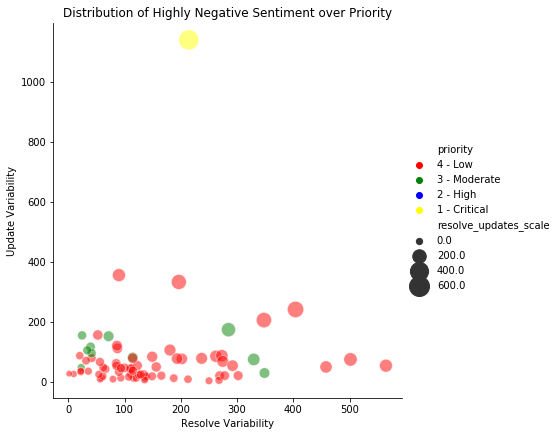

In [198]:
import seaborn as sns
#sns.set_theme(style="white")
colors = ["red", "green", "blue", "yellow"]
sns.set_palette(sns.color_palette(colors))
# Load the example mpg dataset
#mpg = sns.load_dataset("crashes")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="resolve_scale", y="updates_scale", hue="priority", size="resolve_updates_scale",
            sizes=(40, 400), alpha=.5, 
            height=6, data=df1)
plt.title('Distribution of Highly Negative Sentiment over Priority')
plt.xlabel('Resolve Variability')
plt.ylabel('Update Variability')
#plt.sizelabel('resolve')

In [199]:
df2=df_action[df_action['score_text_label']=='negative']
df2.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
1,INC0712761,"SAP FEBA Access to enable change of layout. Permission required (Menu, System, User profile, user data).",4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,0.000000,0.0,neutral,negative,1,-2,-1,-1,negative,negative
5,INC0712198,Please help PR 101209 in ariba stuck as ordering ststus,3 - Moderate,Moderate,3,Incorrectly assigned,Application,0.0,Ariba - Buying,9.0,...,-90.442904,NaN,highly negative,positive,-9,2,-7,-1,highly negative,negative
27,INC0711076,http://registration.dyson.cn/ is unavailable,1 - Critical,Critical,1,NaN,Website,14.0,Dyson ROW sites,34.0,...,0.000000,0.0,neutral,negative,1,-2,-1,-1,negative,negative
31,INC0710789,"I have a new Mac, can't open files from Censhare.",4 - Low,Low,4,NaN,Application,0.0,Censhare,21.0,...,0.000000,0.0,neutral,negative,1,-2,-1,-1,negative,negative
35,INC0710403,CO-IT | DE-2914 | Tmall Genie Account Linking failed on CN PRD Env,1 - Critical,Critical,1,NaN,Application,0.0,Connected - Set Up,29.0,...,0.000000,0.0,neutral,negative,1,-2,-1,-1,negative,negative


Text(41.6455,0.5,'Update Variability')

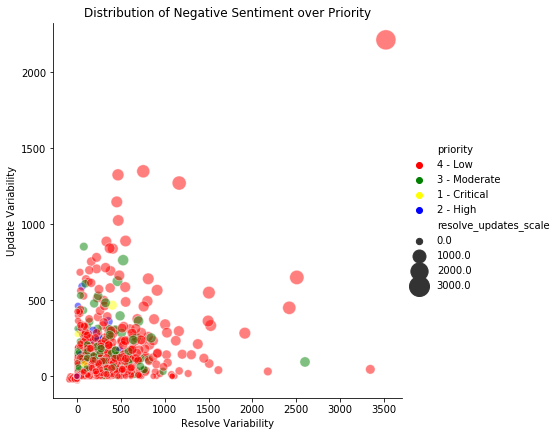

In [202]:
import seaborn as sns
#sns.set_theme(style="white")
colors = ["red", "green", "yellow", "blue"]
sns.set_palette(sns.color_palette(colors))
# Load the example mpg dataset
#mpg = sns.load_dataset("crashes")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="resolve_scale", y="updates_scale", hue="priority", size="resolve_updates_scale",
            sizes=(40, 400), alpha=.5, 
            height=6, data=df2)
plt.title('Distribution of Negative Sentiment over Priority')
plt.xlabel('Resolve Variability')
plt.ylabel('Update Variability')
#plt.sizelabel('resolve')

In [203]:
df2=df_action[df_action['score_text_label']=='highly positive']
df2.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
37,INC0710365,Vendor Number 50003142 (3100-3500 Company Code) is not receiving Remittances anymore.,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,-92.234314,72.295305,highly positive,highly positive,9,4,13,1,highly positive,highly positive
80,INC0708859,Unable to clear errors in FX revaluation run for ANZ in SAP,4 - Low,Low,4,NaN,Application,0.0,SAP RTR,90.0,...,-86.581532,71.067499,highly positive,positive,9,2,11,1,highly positive,highly positive
142,INC0706047,"We order a FA PO,but the system displayed the error,we could not normally order the PO!",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-75.720064,58.011518,highly positive,positive,9,2,11,1,highly positive,highly positive
353,INC0694449,AMS Monitoring: Receipts with ERP Error - RC140105/6000076048,4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-79.969448,65.620478,highly positive,positive,9,2,11,1,highly positive,highly positive
424,INC0691529,DHLKorea – DESADV in error,4 - Low,Low,4,NaN,Application,0.0,SAP PI,88.0,...,-99.422825,79.541857,highly positive,highly positive,9,4,13,1,highly positive,highly positive


Text(40.2263,0.5,'Update Variability')

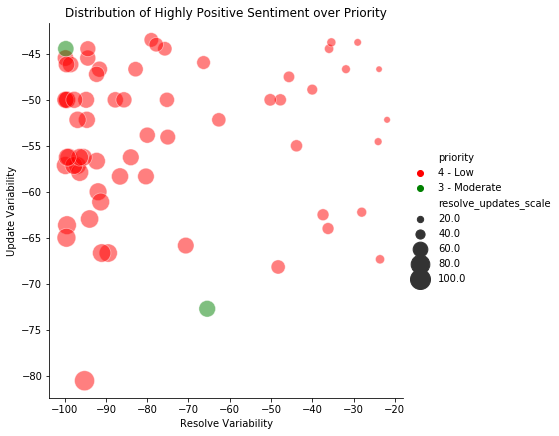

In [205]:
import seaborn as sns
#sns.set_theme(style="white")
colors = ["red", "green", "yellow", "blue"]
sns.set_palette(sns.color_palette(colors))
# Load the example mpg dataset
#mpg = sns.load_dataset("crashes")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="resolve_scale", y="updates_scale", hue="priority", size="resolve_updates_scale",
            sizes=(40, 400), alpha=.5, 
            height=6, data=df2)
plt.title('Distribution of Highly Positive Sentiment over Priority')
plt.xlabel('Resolve Variability')
plt.ylabel('Update Variability')
#plt.sizelabel('resolve')

In [206]:
df2=df_action[df_action['score_text_label']=='positive']
df2.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
0,INC0713025,Customer is requesting a working link to change password,4 - Low,Low,4,NaN,Website,14.0,Dyson DXP sites,33.0,...,-99.871954,82.252778,highly positive,highly positive,9,4,13,1,highly positive,positive
2,INC0712636,prod-pri-hybris-occ_ALB_Has_One_Or_More_Unhealthy_Hosts_In_Its_Pool,4 - Low,Low,4,NaN,Other,8.0,Other,62.0,...,-99.721701,37.743817,neutral,highly positive,1,4,5,1,positive,positive
3,INC0712635,PO stuck in 'Ordering',4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-95.174766,83.872860,highly positive,highly positive,9,4,13,1,highly positive,positive
4,INC0712218,"Dyson entity 8700 PO6000077973 and PO 6000077968 - there is an indicator ""Failed"" reflect on PO copy for vendor. Pls confirm is the PO valid for continue GRIR",4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-91.325772,79.706318,highly positive,highly positive,9,4,13,1,highly positive,positive
6,INC0712189,PLM Issue-The DOC-0553496 cannot check in as the system showed object not check out. It was confusing.,4 - Low,Low,4,NaN,Application,0.0,Teamcenter,105.0,...,-91.961852,69.775129,highly positive,highly positive,9,4,13,1,highly positive,positive


Text(42.3336,0.5,'Update Variability')

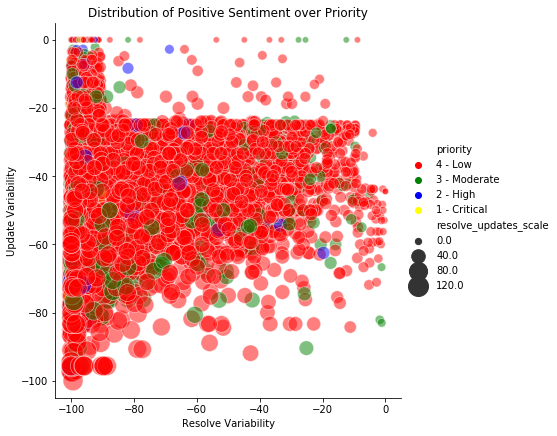

In [208]:
import seaborn as sns
#sns.set_theme(style="white")
colors = ["red", "green", "blue", "yellow"]
sns.set_palette(sns.color_palette(colors))
# Load the example mpg dataset
#mpg = sns.load_dataset("crashes")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="resolve_scale", y="updates_scale", hue="priority", size="resolve_updates_scale",
            sizes=(40, 400), alpha=.5, 
            height=6, data=df2)
plt.title('Distribution of Positive Sentiment over Priority')
plt.xlabel('Resolve Variability')
plt.ylabel('Update Variability')
#plt.sizelabel('resolve')

In [209]:
df2=df_action[df_action['score_text_label']=='neutral']
df2.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
14,INC0711833,No EDI files recieved from Downtons since 00:31,3 - Moderate,Moderate,3,NaN,Application,0.0,SAP PI,88.0,...,-98.645332,NaN,negative,highly positive,-3,4,1,1,neutral,neutral
42,INC0709944,"Please could you force check-in '521208 - 418 LDI LW FLUFFY ASSEMBLY' on Teamcenter PLM. Andrew Aitchison is on holiday, please also check-in all items of his.",4 - Low,Low,4,NaN,Application,0.0,Teamcenter,105.0,...,-71.923406,39.258322,neutral,positive,1,2,3,1,neutral,neutral
46,INC0709876,Need my censhare password reset.,4 - Low,Low,4,NaN,Application,0.0,Censhare,21.0,...,-86.325057,-0.000000,neutral,positive,1,2,3,1,neutral,neutral
81,INC0708840,Error from external system for receipt RC138703 (6000073447) Error from external system for receipt RC129288 (6000066302),4 - Low,Low,4,NaN,Application,0.0,Ariba - Buying,9.0,...,-75.199570,38.028221,neutral,positive,1,2,3,1,neutral,neutral
82,INC0708819,reset password for Sap 105 ERP,4 - Low,Low,4,NaN,Application,0.0,SAP Security,92.0,...,-89.092032,-0.000000,neutral,positive,1,2,3,1,neutral,neutral


Text(40.1833,0.5,'Update Variability')

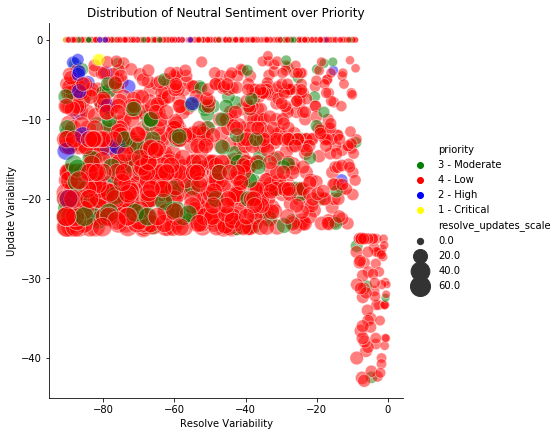

In [211]:
import seaborn as sns
#sns.set_theme(style="white")
colors = ["green", "red", "blue", "yellow"]
sns.set_palette(sns.color_palette(colors))
# Load the example mpg dataset
#mpg = sns.load_dataset("crashes")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="resolve_scale", y="updates_scale", hue="priority", size="resolve_updates_scale",
            sizes=(40, 400), alpha=.5, 
            height=6, data=df2)
plt.title('Distribution of Neutral Sentiment over Priority')
plt.xlabel('Resolve Variability')
plt.ylabel('Update Variability')
#plt.sizelabel('resolve')

In [212]:
df2=df_action[df_action['score_text_label']=='ok']
df2.head()

,incident_number,short_description,priority,priority_desc,priority_no,tags,category,category_no,subcategory1,subcategory1_no,...,resolve_scale,resolve_updates_scale,updates_label,resolve_label,updates_points,resolve_time_points,sum_points,polarity,sentiment_label,score_text_label
53,INC0709833,Spinning Wheel on CRM and business error message,1 - Critical,Critical,1,NaN,Application,0.0,SAP CRM,80.0,...,-99.617908,NaN,highly negative,highly positive,-9,4,-5,-1,negative,ok
92,INC0707763,I need to raise a Service Entry Sheet within a PO but it won't allow me,3 - Moderate,Moderate,3,NaN,Application,0.0,Ariba - Buying,9.0,...,-96.578052,NaN,highly negative,highly positive,-9,4,-5,-1,negative,ok
128,INC0706648,Dyson Personal Message Management,4 - Low,Low,4,NaN,Application,0.0,SAP PI,88.0,...,-96.547347,80.227737,highly positive,highly positive,9,4,13,1,highly positive,ok
152,INC0704930,R2 - Sales: crm isssue,3 - Moderate,Moderate,3,NaN,Application,0.0,SAP CRM,80.0,...,-64.460663,46.353951,positive,positive,3,2,5,1,positive,ok
177,INC0703857,Conflict with serial number case 04736853 | CSS-8746,4 - Low,Low,4,Salesforce,Website,14.0,Dyson DXP sites,33.0,...,-91.607584,82.888894,highly positive,highly positive,9,4,13,1,highly positive,ok


Text(39.4522,0.5,'Update Variability')

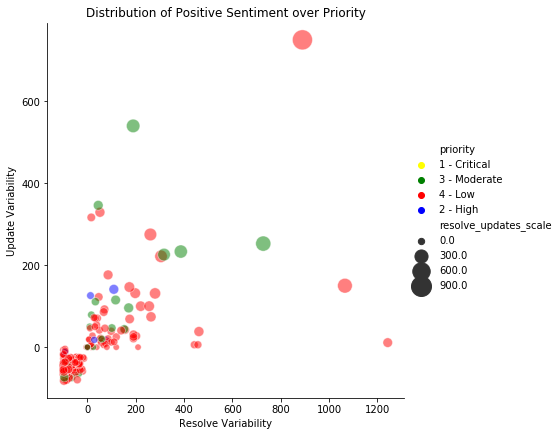

In [214]:
import seaborn as sns
#sns.set_theme(style="white")
colors = ["yellow", "green", "red", "blue"]
sns.set_palette(sns.color_palette(colors))
# Load the example mpg dataset
#mpg = sns.load_dataset("crashes")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="resolve_scale", y="updates_scale", hue="priority", size="resolve_updates_scale",
            sizes=(40, 400), alpha=.5, 
            height=6, data=df2)
plt.title('Distribution of Positive Sentiment over Priority')
plt.xlabel('Resolve Variability')
plt.ylabel('Update Variability')
#plt.sizelabel('resolve')

In [215]:
df_action = df_action[['category','score_text_label','priority_desc']]

In [216]:
data1 = df_action.pivot_table(index = 'category',columns='score_text_label', aggfunc='count', fill_value=0)
data1['total'] = data1.sum(axis=1)

In [217]:
data1

priority_desc                                        \
score_text_label     highly negative highly positive negative neutral   ok   
category                                                                     
Application                      100              57     4944    1581  303   
Communication Device               0               0        5       0    0   
Computer                           0               0        1       0    0   
Data                               0               0        3       0    0   
Database                           0               0        2       0    0   
E-Mail                             0               0        6       0    0   
Monitoring Event                   0               0        2       0    0   
Network                            0               0        4       0    0   
Other                              0               0       63      13    5   
Peripheral                         0               0        2       0    0   
Salesforce                         0               0        6       0    0   
Server                             0               0        8       0    0   
Software                           1               0       96      20    1   
User Admin                         0               0        1       0    0   
Website                            6               8     1034     238   39   
Workday- OU Changes                0               0        2       0    0   

                               total  
score_text_label     positive         
category                              
Application              4338  11323  
Communication Device        0      5  
Computer                    0      1  
Data                        1      4  
Database                    0      2  
E-Mail                      0      6  
Monitoring Event            0      2  
Network                     0      4  
Other                      43    124  
Peripheral                  0      2  
Salesforce                  9     15  
Server                      2     10  
Software                   32    150  
User Admin                  0      1  
Website                   847   2172  
Workday- OU Changes         0      2

In [218]:
mi = data1.columns
mi.tolist()
ind = pd.Index([e[0] + e[1] for e in mi.tolist()])
data1.columns = ind
data1= data1.reset_index()
data1

,category,priority_deschighly negative,priority_deschighly positive,priority_descnegative,priority_descneutral,priority_descok,priority_descpositive,total
0,Application,100,57,4944,1581,303,4338,11323
1,Communication Device,0,0,5,0,0,0,5
2,Computer,0,0,1,0,0,0,1
3,Data,0,0,3,0,0,1,4
4,Database,0,0,2,0,0,0,2
5,E-Mail,0,0,6,0,0,0,6
6,Monitoring Event,0,0,2,0,0,0,2
7,Network,0,0,4,0,0,0,4
8,Other,0,0,63,13,5,43,124
9,Peripheral,0,0,2,0,0,0,2


In [219]:
ds1 = data1.sort_values('total',ascending=False)


In [220]:
ds1 = ds1[['total', 'priority_deschighly negative', 'priority_descnegative', 'priority_descneutral', 'priority_descok', 'priority_descpositive', 'priority_deschighly positive', 'category']]
ds1.rename(columns = {'total':'total', 'priority_deschighly negative':'highly negative', 'priority_descnegative': 'negative', 'priority_descneutral': 'neutral', 'priority_descok': 'ok', 'priority_descpositive': 'positive', 'priority_deschighly positive': 'highly positive', 'category':'category'}, inplace = True)


In [221]:
ds1

,total,highly negative,negative,neutral,ok,positive,highly positive,category
0,11323,100,4944,1581,303,4338,57,Application
14,2172,6,1034,238,39,847,8,Website
12,150,1,96,20,1,32,0,Software
8,124,0,63,13,5,43,0,Other
10,15,0,6,0,0,9,0,Salesforce
11,10,0,8,0,0,2,0,Server
5,6,0,6,0,0,0,0,E-Mail
1,5,0,5,0,0,0,0,Communication Device
3,4,0,3,0,0,1,0,Data
7,4,0,4,0,0,0,0,Network


In [222]:
ds1['category'].astype(str)

0              Application
14                 Website
12                Software
8                    Other
10              Salesforce
11                  Server
5                   E-Mail
1     Communication Device
3                     Data
7                  Network
4                 Database
6         Monitoring Event
9               Peripheral
15     Workday- OU Changes
2                 Computer
13              User Admin
Name: category, dtype: object

In [223]:
ds1

,total,highly negative,negative,neutral,ok,positive,highly positive,category
0,11323,100,4944,1581,303,4338,57,Application
14,2172,6,1034,238,39,847,8,Website
12,150,1,96,20,1,32,0,Software
8,124,0,63,13,5,43,0,Other
10,15,0,6,0,0,9,0,Salesforce
11,10,0,8,0,0,2,0,Server
5,6,0,6,0,0,0,0,E-Mail
1,5,0,5,0,0,0,0,Communication Device
3,4,0,3,0,0,1,0,Data
7,4,0,4,0,0,0,0,Network


In [235]:
ds1[:7]

,total,highly negative,negative,neutral,ok,positive,highly positive,category
0,11323,100,4944,1581,303,4338,57,Application
14,2172,6,1034,238,39,847,8,Website
12,150,1,96,20,1,32,0,Software
8,124,0,63,13,5,43,0,Other
10,15,0,6,0,0,9,0,Salesforce
11,10,0,8,0,0,2,0,Server
5,6,0,6,0,0,0,0,E-Mail


IndexError: index 7 is out of bounds for axis 1 with size 7

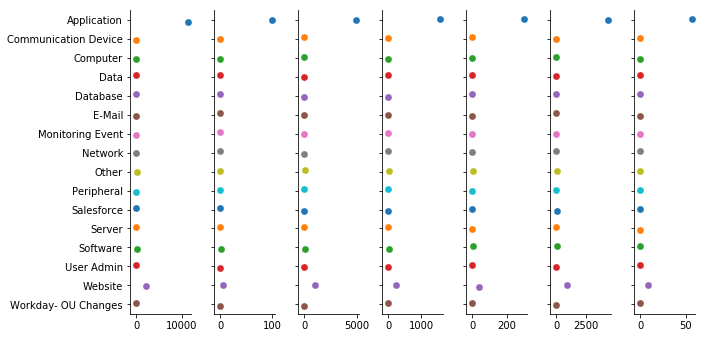

In [236]:
# sns.set_theme(style="whitegrid")

# Load the dataset
# crashes = sns.load_dataset("car_crashes")

g = ''

# Make the PairGrid
g = sns.PairGrid(ds1,
                 x_vars=ds1[:7], y_vars=["category"],
                 height=5, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=7, orient="h",
      palette="tab10", linewidth=0.2, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 50), xlabel="Sentiments", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["total", "highly negative", "negative", "neutral",
          "ok", "positive", "highly positive"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)